In [14]:
# Install required packages
%pip install ultralytics opencv-python pillow torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

images_dir = "Images"
os.listdir(images_dir)[:16]

['beats.jpeg',
 'camera.jpeg',
 'camera2.jpeg',
 'df_model_features.csv',
 'headphones.jpeg',
 'ipad.jpeg',
 'iphone.jpeg',
 'keyboard_mechanical.jpeg',
 'laptop_setup.jpeg',
 'macbook_keyboard.jpeg',
 'mouse.jpeg',
 'Samsung_galaxy.jpeg',
 'smartwatch.jpeg',
 'speaker.jpeg',
 'tablet.jpeg',
 'TV_remote.jpeg']

In [16]:
# Load pretrained YOLOv8n model
yolo_model = YOLO('yolov8n.pt')  # nano version for speed
print("YOLOv8n model loaded successfully")

YOLOv8n model loaded successfully


In [17]:
# Function to run YOLO detection on an image
def detect_objects_yolo(image_path, conf_threshold=0.25):
    """
    Run YOLOv8n detection on a single image
    
    Args:
        image_path: path to image file
        conf_threshold: confidence threshold for detections
    
    Returns:
        results object from YOLO
    """
    results = yolo_model(image_path, conf=conf_threshold)
    return results[0]

# Function to visualize YOLO results
def visualize_yolo_detection(image_path, results):
    """
    Display image with YOLO detection boxes and labels
    """
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    
    # Draw boxes and labels
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        conf = box.conf[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        label = f"{results.names[cls]} {conf:.2f}"
        
        plt.gca().add_patch(plt.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            fill=False, edgecolor='red', linewidth=2
        ))
        plt.text(x1, y1-10, label, color='red', fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    plt.axis('off')
    plt.title(f"YOLOv8n Detection: {os.path.basename(image_path)}")
    plt.tight_layout()
    plt.show()

Running YOLOv8n detection on 15 images...

Processing: beats.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\beats.jpeg: 640x640 1 cake, 91.9ms
Speed: 5.2ms preprocess, 91.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


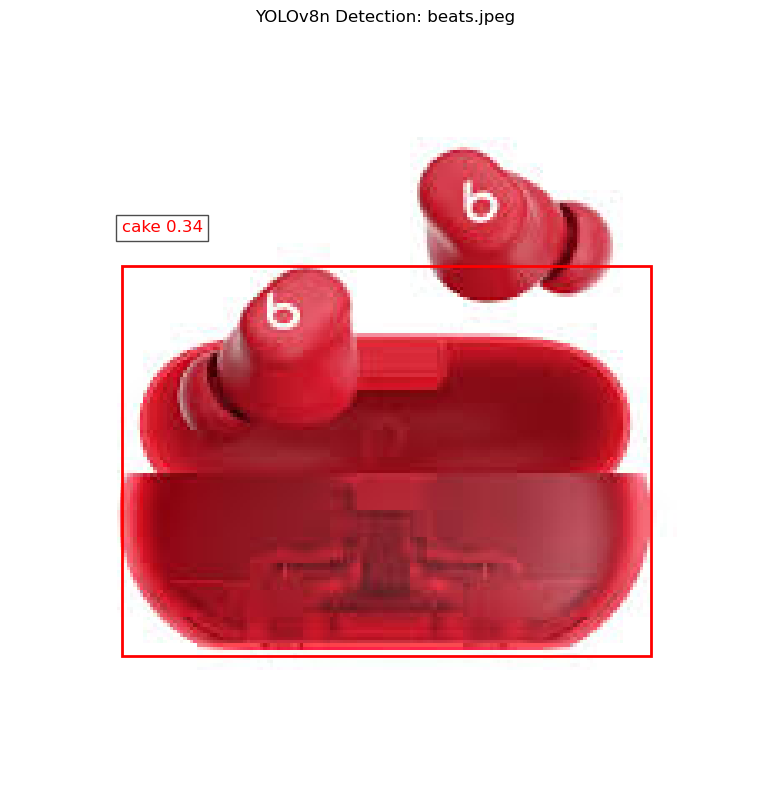

  Detected 1 objects

Processing: camera.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\camera.jpeg: 448x640 1 fire hydrant, 1 potted plant, 64.6ms
Speed: 3.2ms preprocess, 64.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


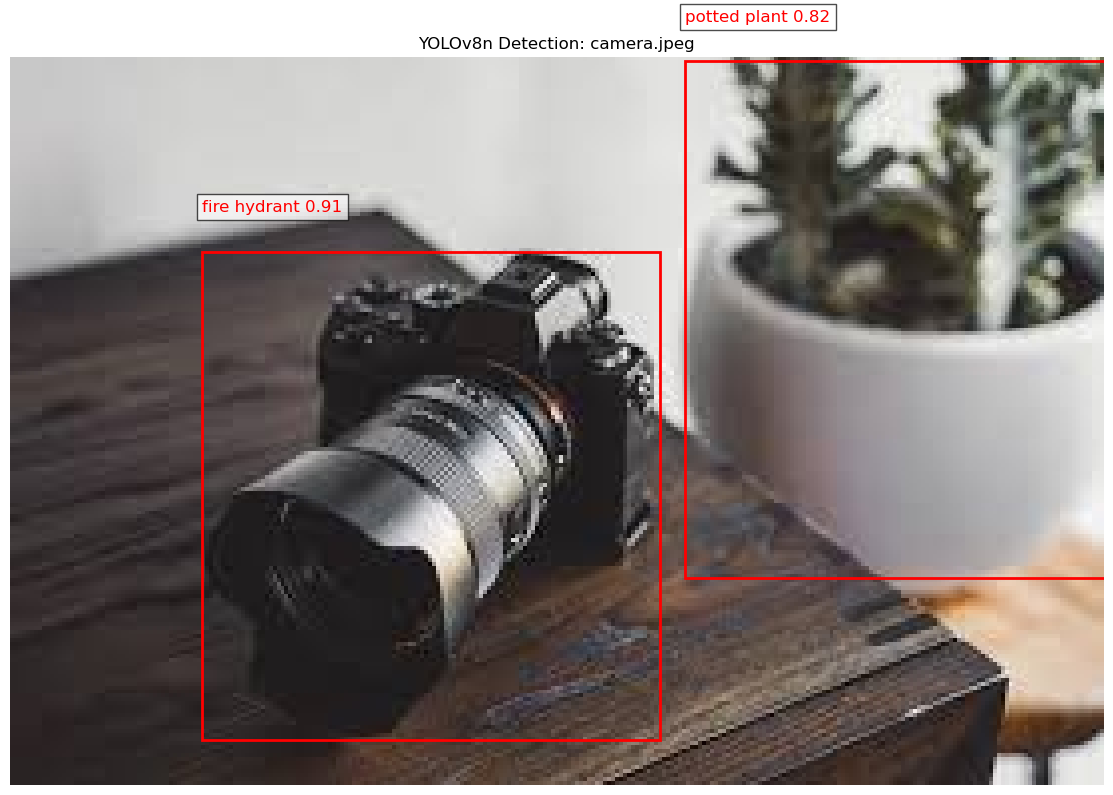

  Detected 2 objects

Processing: camera2.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\camera2.jpeg: 448x640 (no detections), 59.6ms
Speed: 2.7ms preprocess, 59.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


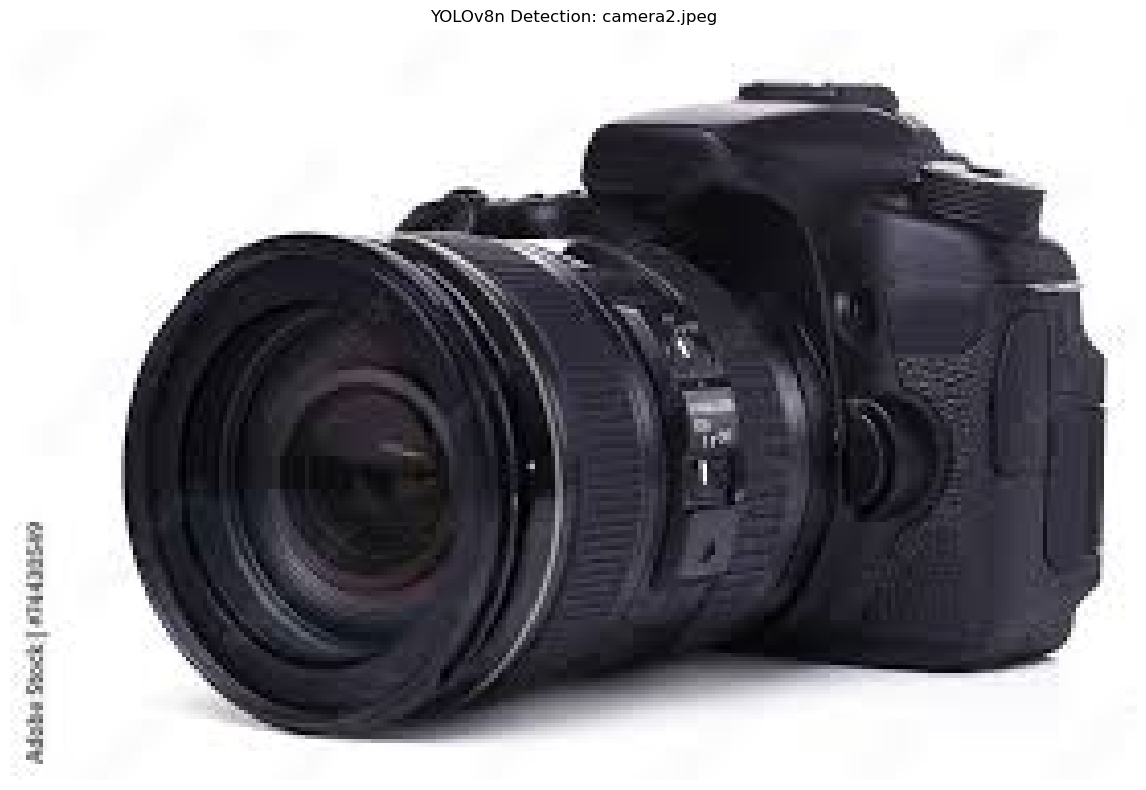

  Detected 0 objects

Processing: headphones.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\headphones.jpeg: 448x640 1 cup, 1 laptop, 1 mouse, 1 cell phone, 62.0ms
Speed: 2.3ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


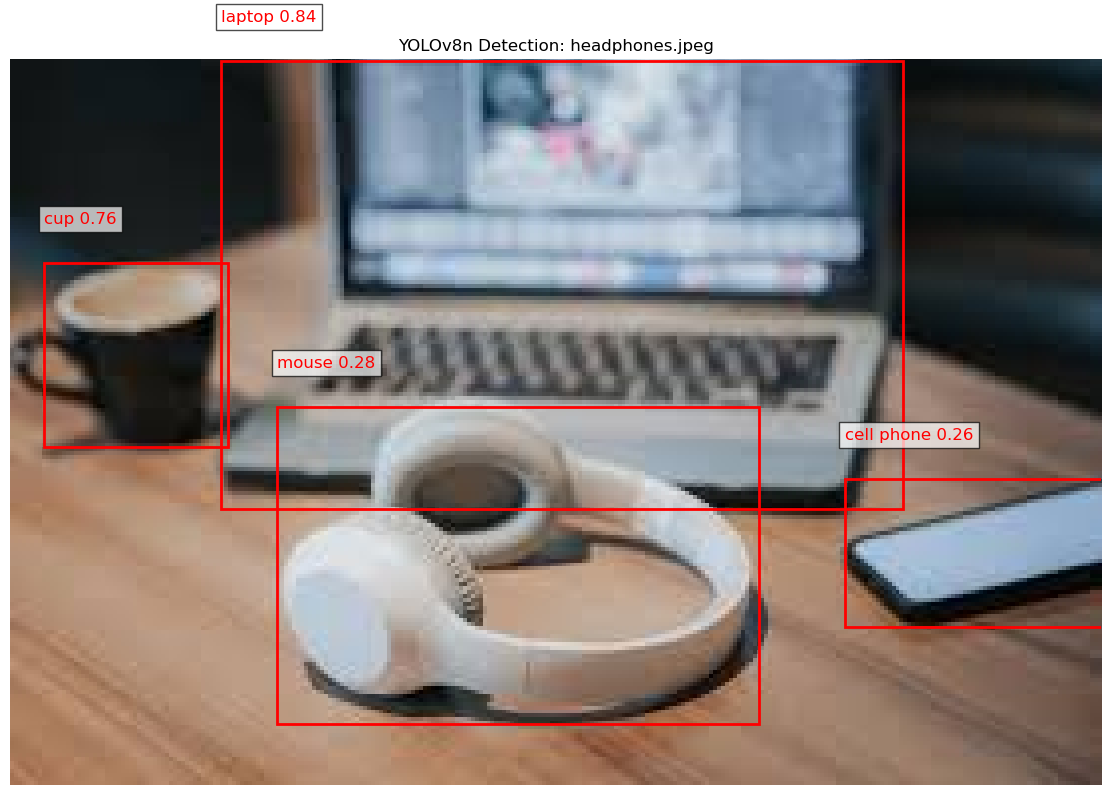

  Detected 4 objects

Processing: ipad.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\ipad.jpeg: 448x640 1 book, 60.9ms
Speed: 2.2ms preprocess, 60.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


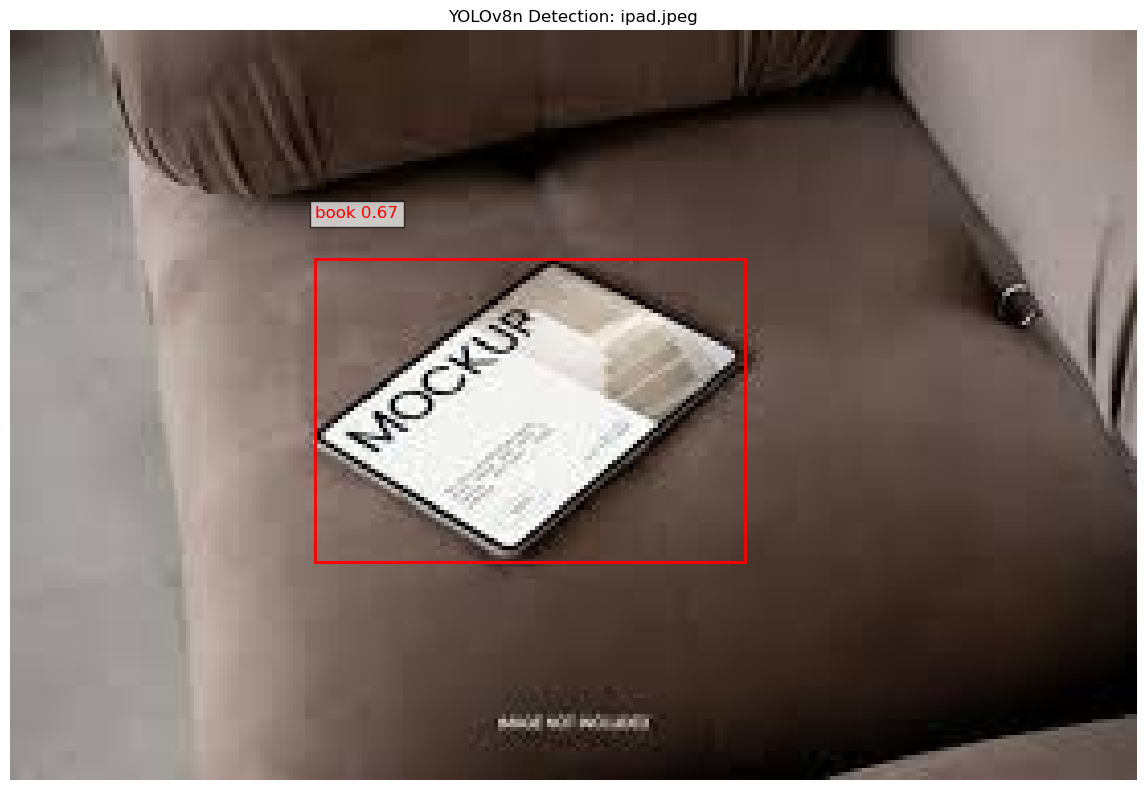

  Detected 1 objects

Processing: iphone.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\iphone.jpeg: 384x640 1 cell phone, 73.1ms
Speed: 1.8ms preprocess, 73.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


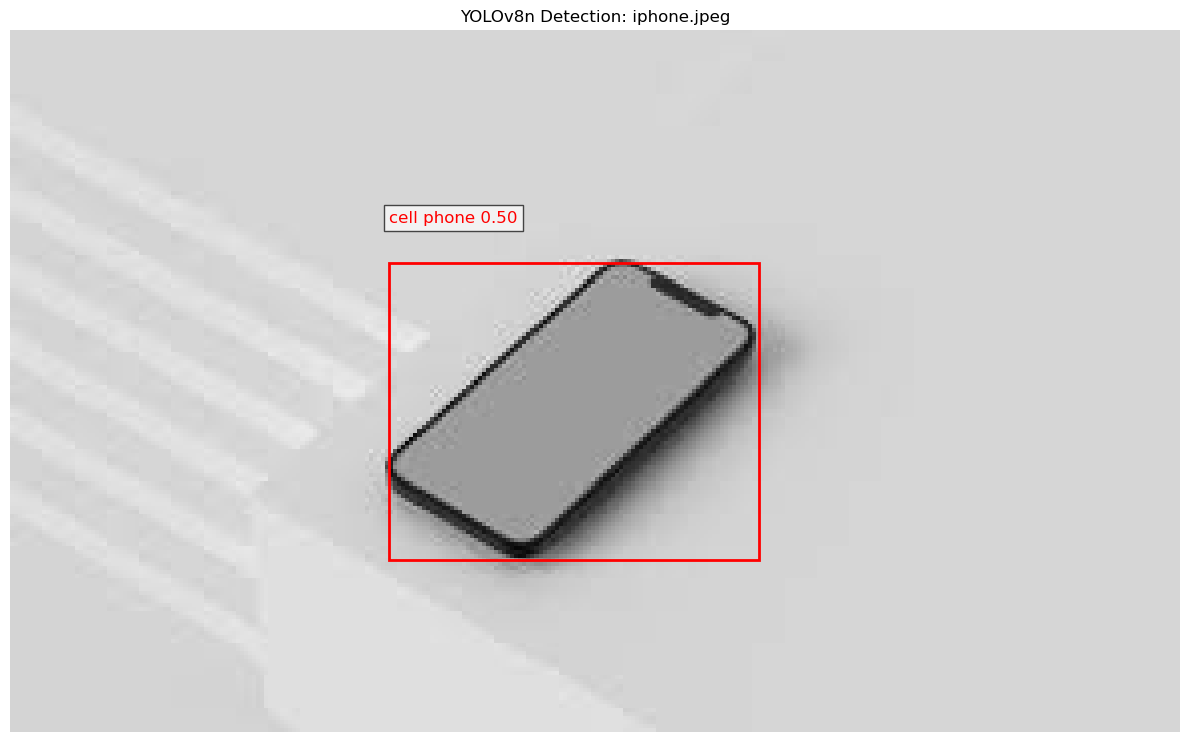

  Detected 1 objects

Processing: keyboard_mechanical.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\keyboard_mechanical.jpeg: 384x640 1 keyboard, 52.3ms
Speed: 2.5ms preprocess, 52.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


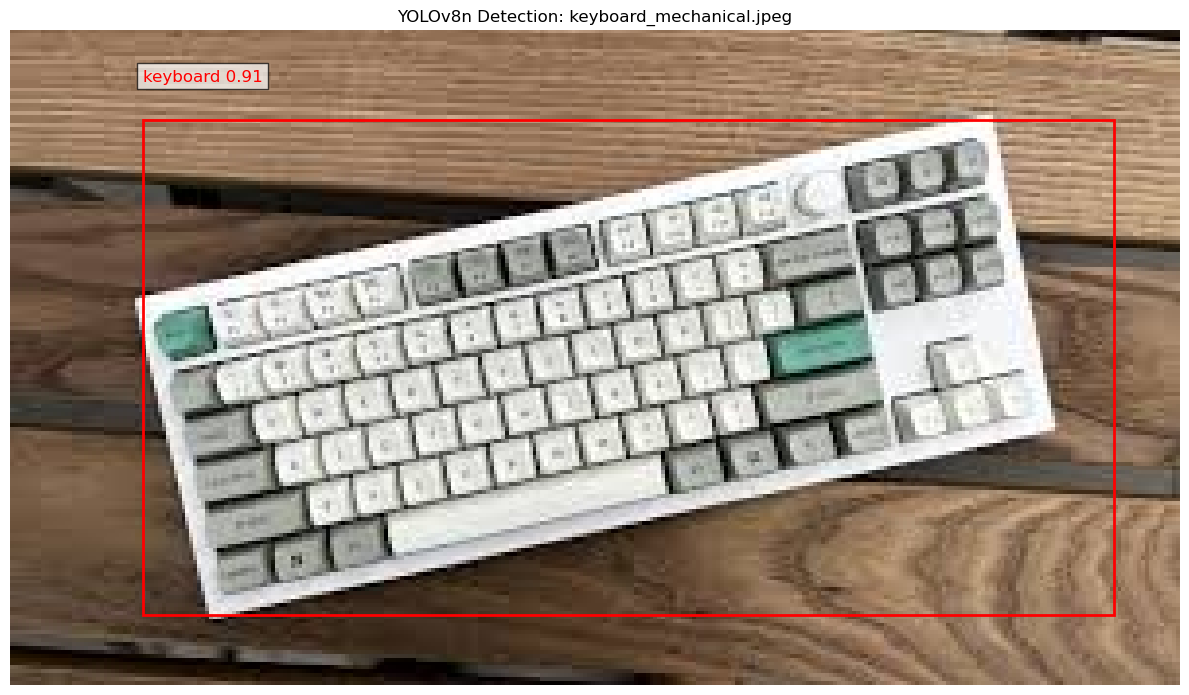

  Detected 1 objects

Processing: laptop_setup.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\laptop_setup.jpeg: 352x640 2 tvs, 1 laptop, 1 keyboard, 72.4ms
Speed: 1.9ms preprocess, 72.4ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


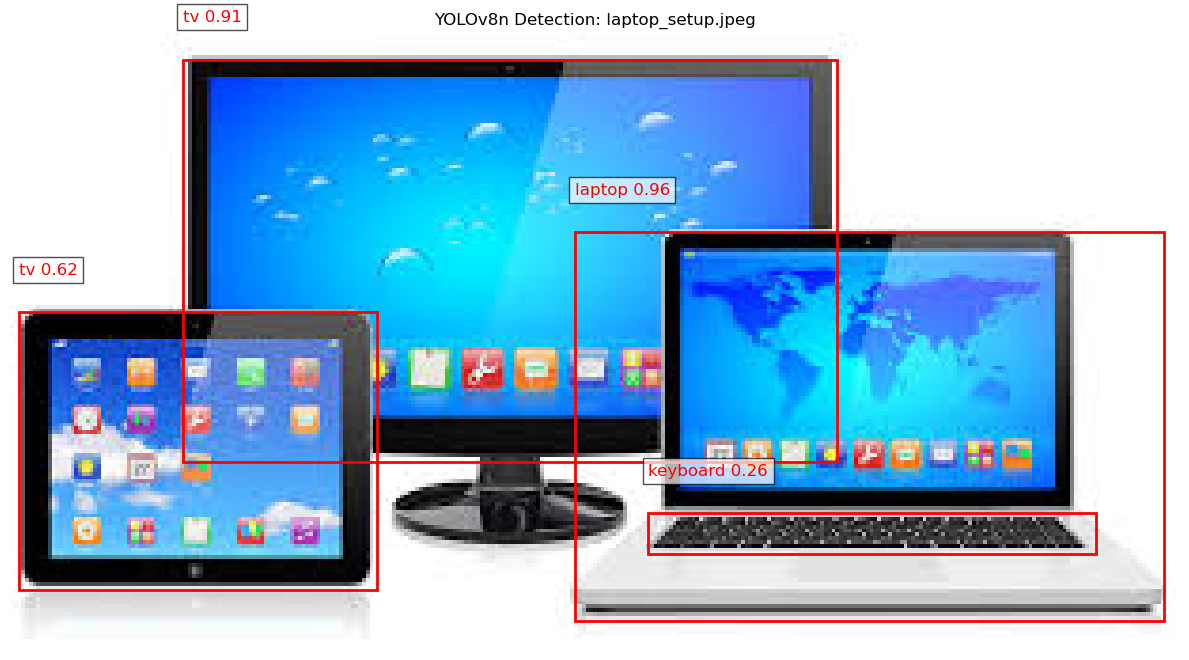

  Detected 4 objects

Processing: macbook_keyboard.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\macbook_keyboard.jpeg: 480x640 2 keyboards, 82.0ms
Speed: 2.9ms preprocess, 82.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


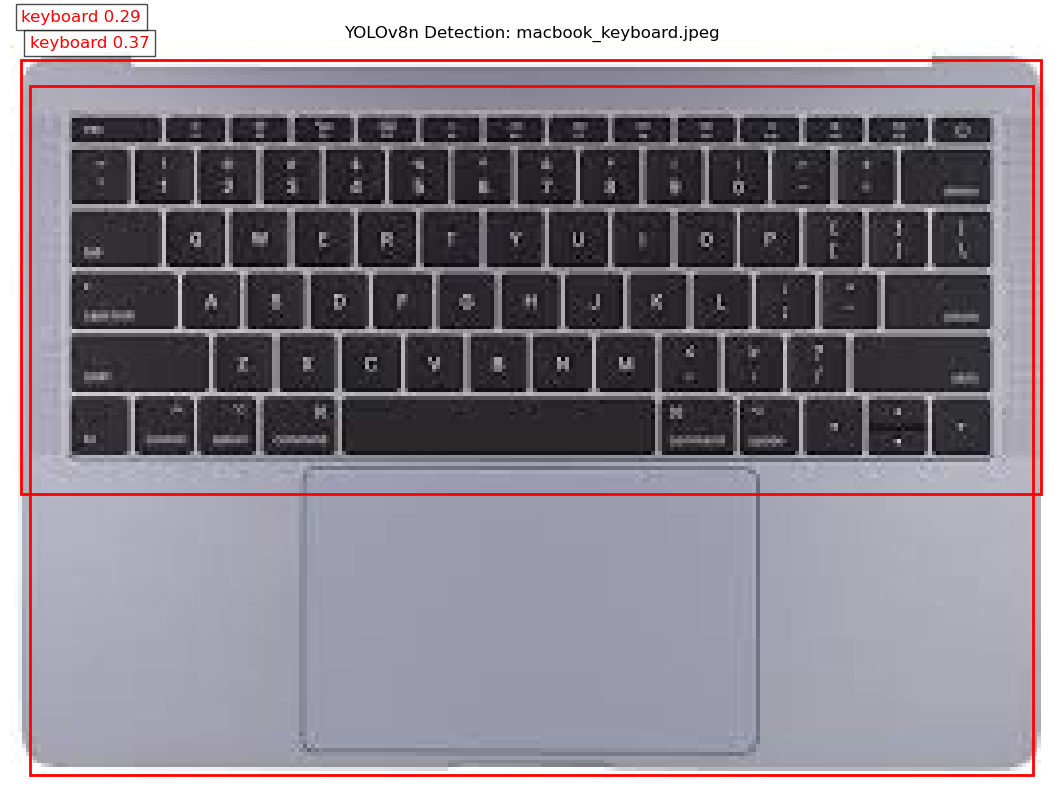

  Detected 2 objects

Processing: mouse.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\mouse.jpeg: 640x640 1 parking meter, 82.0ms
Speed: 3.9ms preprocess, 82.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


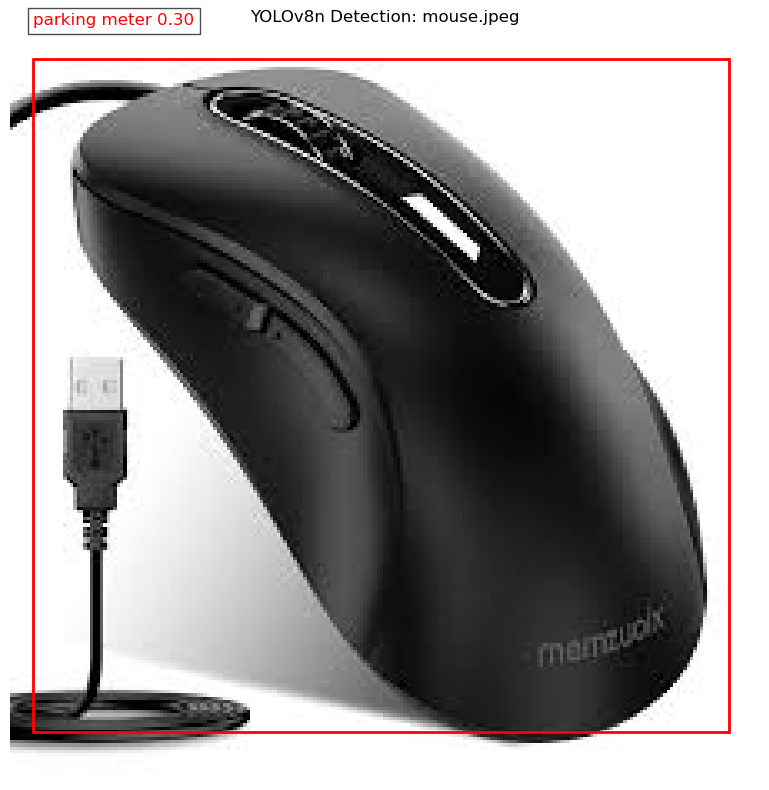

  Detected 1 objects

Processing: Samsung_galaxy.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\Samsung_galaxy.jpeg: 384x640 (no detections), 70.6ms
Speed: 2.8ms preprocess, 70.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


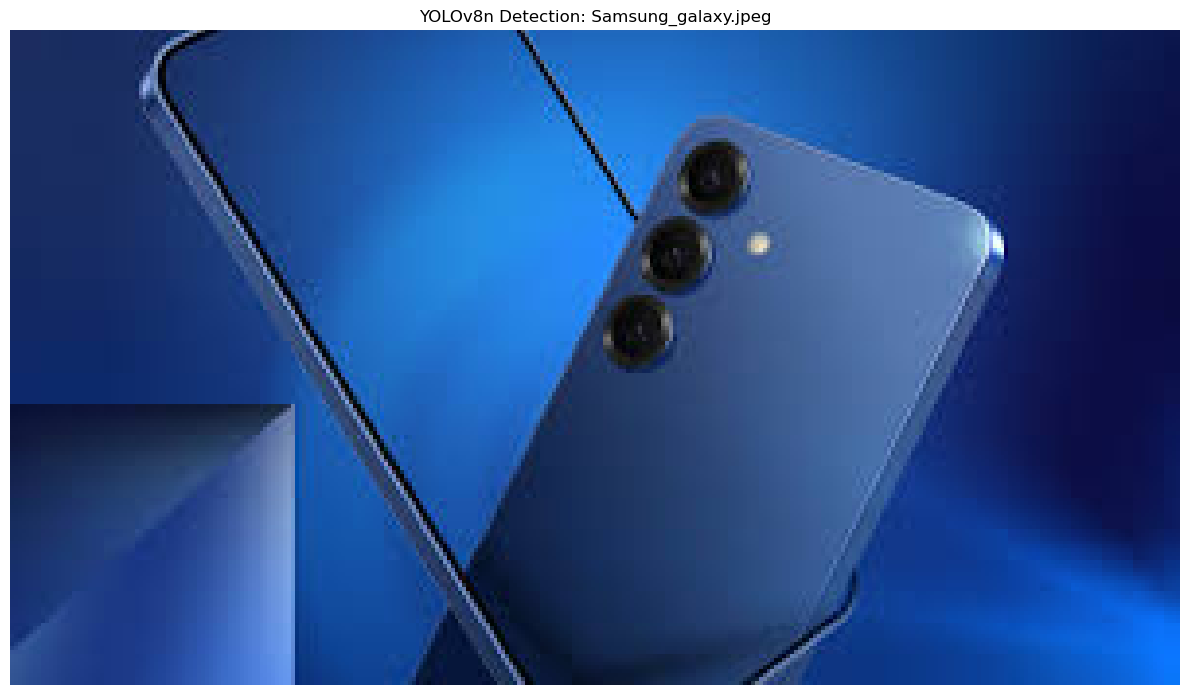

  Detected 0 objects

Processing: smartwatch.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\smartwatch.jpeg: 384x640 1 person, 93.9ms
Speed: 1.6ms preprocess, 93.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


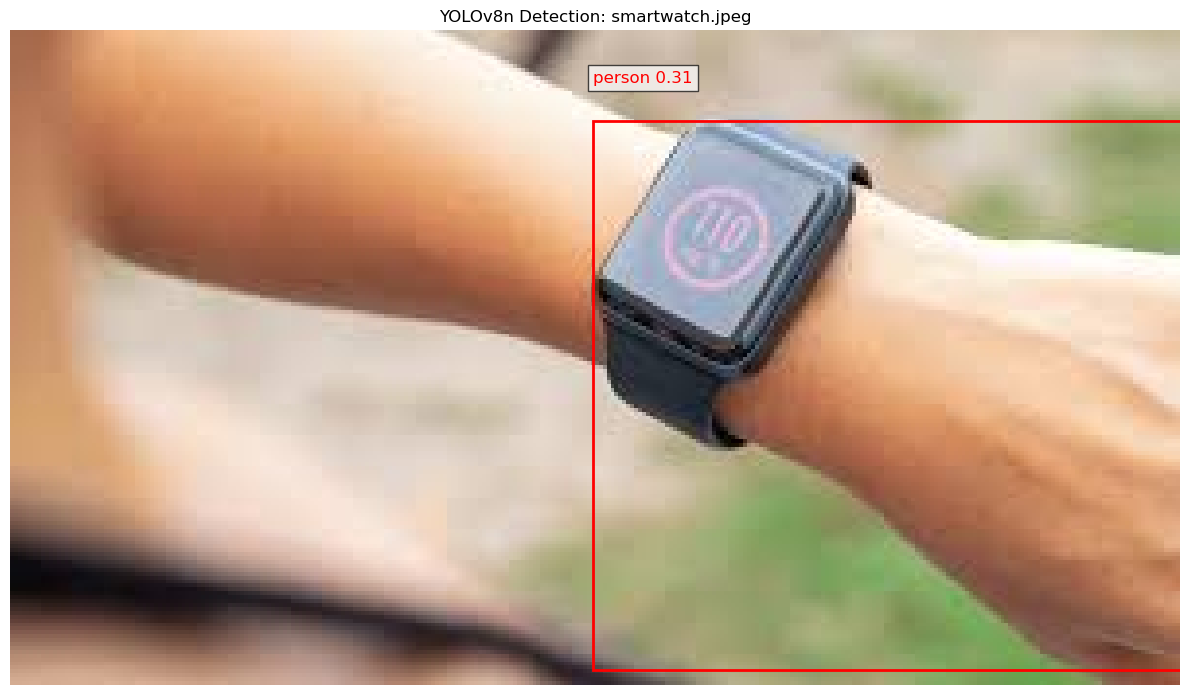

  Detected 1 objects

Processing: speaker.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\speaker.jpeg: 416x640 (no detections), 131.2ms
Speed: 2.2ms preprocess, 131.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


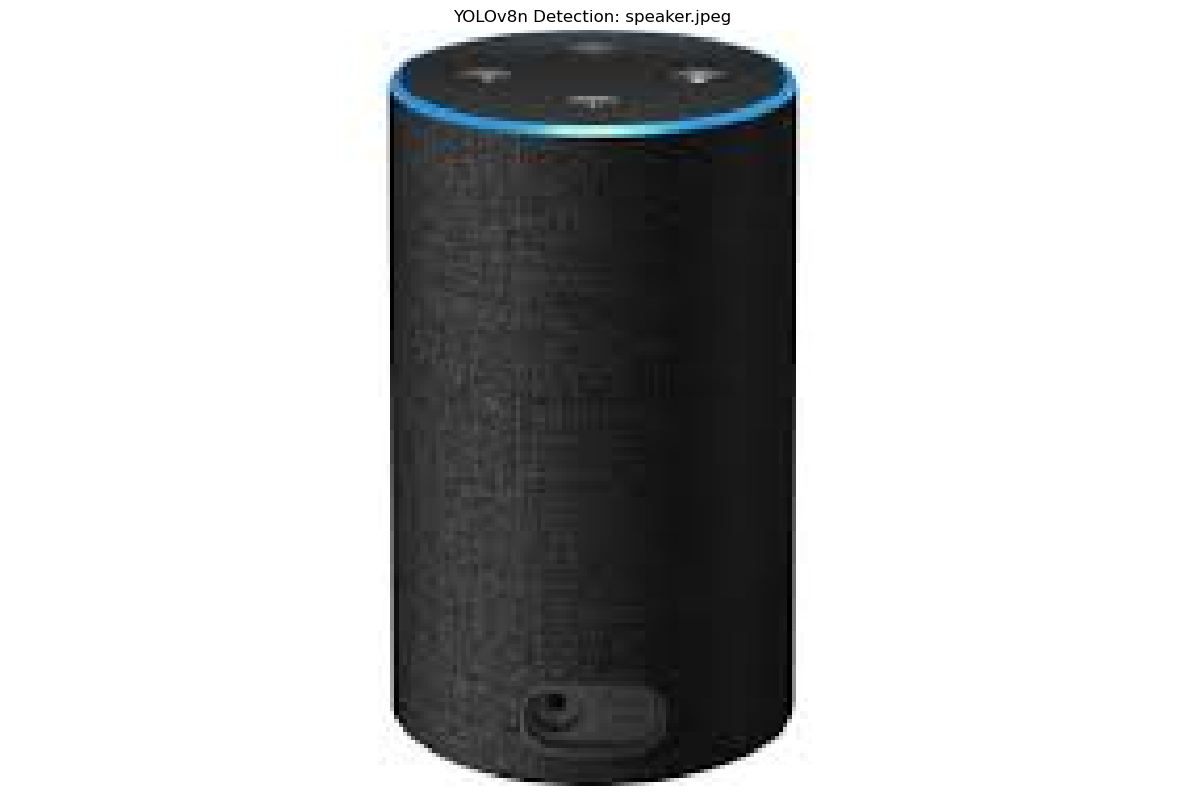

  Detected 0 objects

Processing: tablet.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\tablet.jpeg: 640x640 (no detections), 129.9ms
Speed: 6.0ms preprocess, 129.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


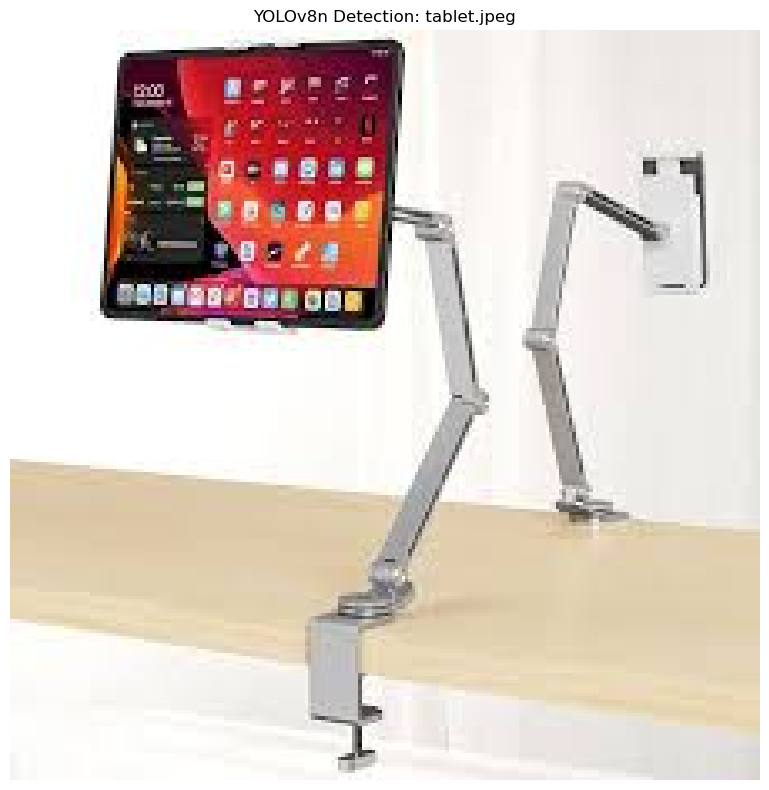

  Detected 0 objects

Processing: TV_remote.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\TV_remote.jpeg: 448x640 1 remote, 185.3ms
Speed: 2.8ms preprocess, 185.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


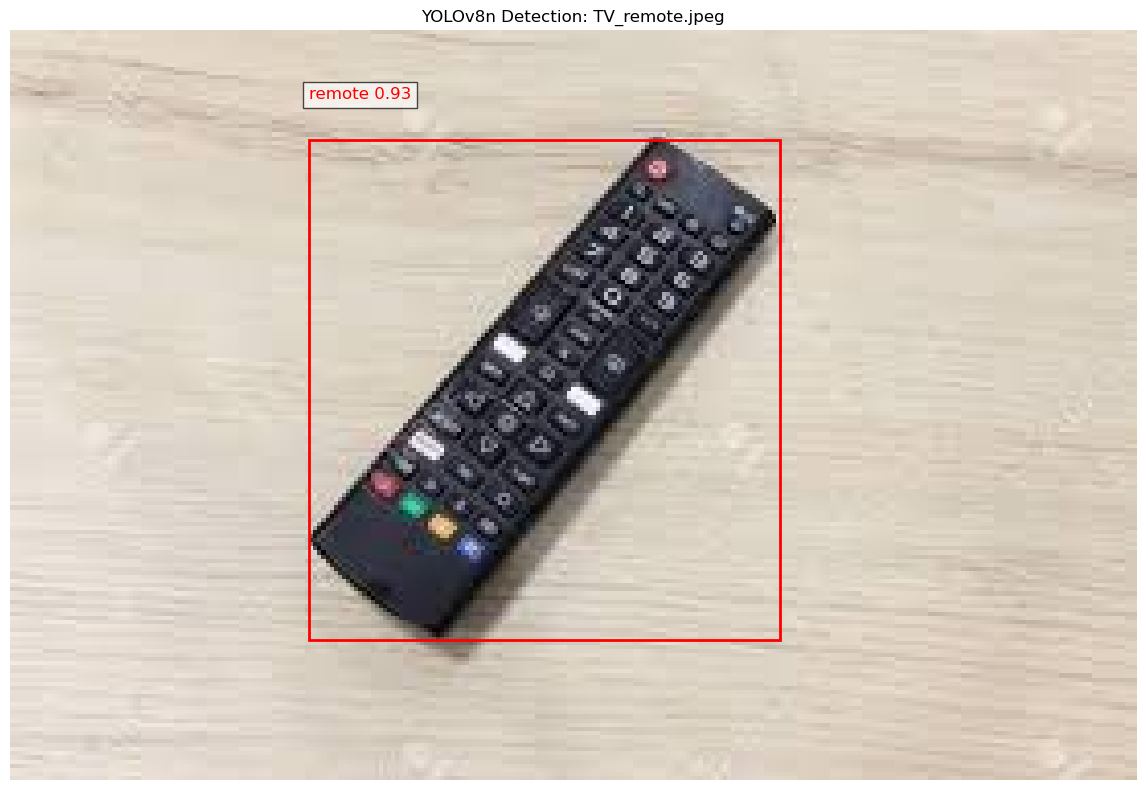

  Detected 1 objects



In [18]:
# Run detection on all images in directory
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if len(image_files) == 0:
    print("No images found. Please add product images to:", images_dir)
else:
    print(f"Running YOLOv8n detection on {len(image_files)} images...\n")
    
    detection_results = []
    
    # Process ALL images instead of just first 5
    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        print(f"Processing: {img_file}")
        
        # Run detection
        results = detect_objects_yolo(img_path)
        
        # Store results
        detection_results.append({
            'filename': img_file,
            'num_detections': len(results.boxes),
            'detected_classes': [results.names[int(box.cls[0])] for box in results.boxes],
            'confidences': [float(box.conf[0]) for box in results.boxes]
        })
        
        # Visualize
        visualize_yolo_detection(img_path, results)
        print(f"  Detected {len(results.boxes)} objects")
        print()

In [19]:
# Summary of YOLO detections
if detection_results:
    results_df = pd.DataFrame(detection_results)
    print("YOLO Detection Summary:")
    print(results_df)
    
    # Save results
    results_df.to_csv('df_yolo_detections.csv', index=False)
    print("\nSaved detection results to: /Images/df_yolo_detections.csv")

YOLO Detection Summary:
                    filename  num_detections  \
0                 beats.jpeg               1   
1                camera.jpeg               2   
2               camera2.jpeg               0   
3            headphones.jpeg               4   
4                  ipad.jpeg               1   
5                iphone.jpeg               1   
6   keyboard_mechanical.jpeg               1   
7          laptop_setup.jpeg               4   
8      macbook_keyboard.jpeg               2   
9                 mouse.jpeg               1   
10       Samsung_galaxy.jpeg               0   
11           smartwatch.jpeg               1   
12              speaker.jpeg               0   
13               tablet.jpeg               0   
14            TV_remote.jpeg               1   

                    detected_classes  \
0                             [cake]   
1       [fire hydrant, potted plant]   
2                                 []   
3   [laptop, cup, mouse, cell phone]   
4      

### YOLOv8n Analysis Summary

YOLOv8n demonstrates rapid object detection on product images. The model:
- Provides bounding boxes around detected objects
- Assigns class labels from COCO dataset (80 common object categories)
- Returns confidence scores for each detection

**Key Observations:**
- Detection speed is very fast (real-time capable on CPU)
- Pretrained model does not accurately recognize common consumer electronics (laptops, phones, keyboards, etc.)
- Confidence scores do not offer much help in filtering low-quality detections

**Practical Application:**
In a customer support workflow, YOLO could:
1. Automatically identify product type from uploaded images
2. Route tickets to appropriate teams based on detected products
3. Flag tickets with unusual or multiple products for manual review
4. Validate that customer-submitted images match the product in the ticket

In [20]:
# Now add Mask R-CNN implementation
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [21]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Load pretrained Mask R-CNN
maskrcnn_model = maskrcnn_resnet50_fpn(pretrained=True)
maskrcnn_model.eval()

print("Mask R-CNN model loaded successfully")

# COCO class names
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

c:\Users\david\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mask R-CNN model loaded successfully


In [22]:
def detect_with_maskrcnn(image_path, conf_threshold=0.5):
    """
    Run Mask R-CNN on an image and return detections with masks
    
    Args:
        image_path: path to image
        conf_threshold: minimum confidence score
    
    Returns:
        dictionary with boxes, labels, scores, and masks
    """
    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).unsqueeze(0)
    
    # Run inference
    with torch.no_grad():
        predictions = maskrcnn_model(img_tensor)[0]
    
    # Filter by confidence
    keep = predictions['scores'] > conf_threshold
    
    return {
        'boxes': predictions['boxes'][keep].cpu().numpy(),
        'labels': predictions['labels'][keep].cpu().numpy(),
        'scores': predictions['scores'][keep].cpu().numpy(),
        'masks': predictions['masks'][keep].cpu().numpy()
    }

def visualize_maskrcnn(image_path, detections):
    """
    Visualize Mask R-CNN results with segmentation masks
    """
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(img_array)
    
    # Create a color map for masks
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    
    for idx, (box, label, score, mask) in enumerate(zip(
        detections['boxes'], 
        detections['labels'], 
        detections['scores'],
        detections['masks']
    )):
        # Draw bounding box
        x1, y1, x2, y2 = box
        plt.gca().add_patch(plt.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            fill=False, edgecolor='cyan', linewidth=2
        ))
        
        # Add label
        class_name = COCO_CLASSES[label]
        label_text = f"{class_name} {score:.2f}"
        plt.text(x1, y1-10, label_text, color='cyan', fontsize=10,
                bbox=dict(facecolor='black', alpha=0.7))
        
        # Overlay mask
        mask_binary = mask[0] > 0.5
        color = colors[idx % len(colors)]
        colored_mask = np.zeros((*mask_binary.shape, 4))
        colored_mask[mask_binary] = [*color[:3], 0.4]  # RGBA with alpha
        plt.imshow(colored_mask)
    
    plt.axis('off')
    plt.title(f"Mask R-CNN Segmentation: {os.path.basename(image_path)}")
    plt.tight_layout()
    plt.show()

Running Mask R-CNN instance segmentation...

Processing: beats.jpeg


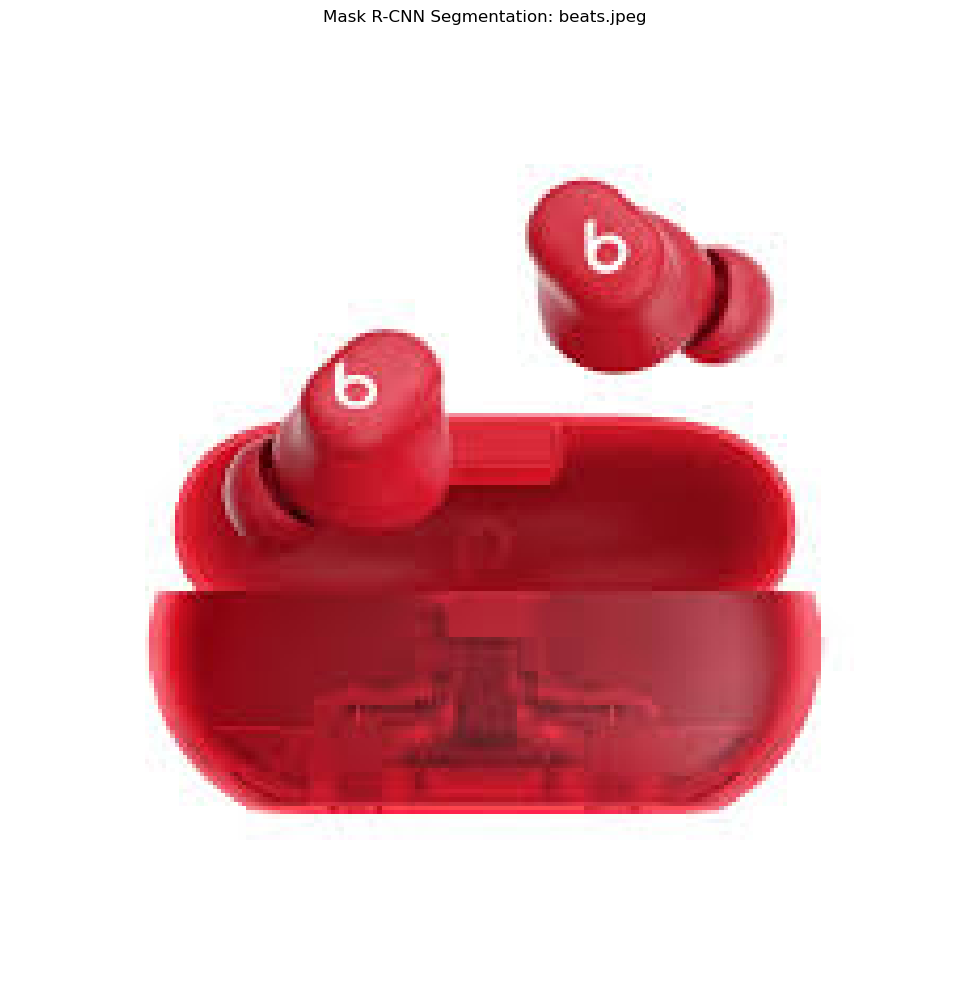

  Detected 0 instances
  Objects: 

Processing: camera.jpeg


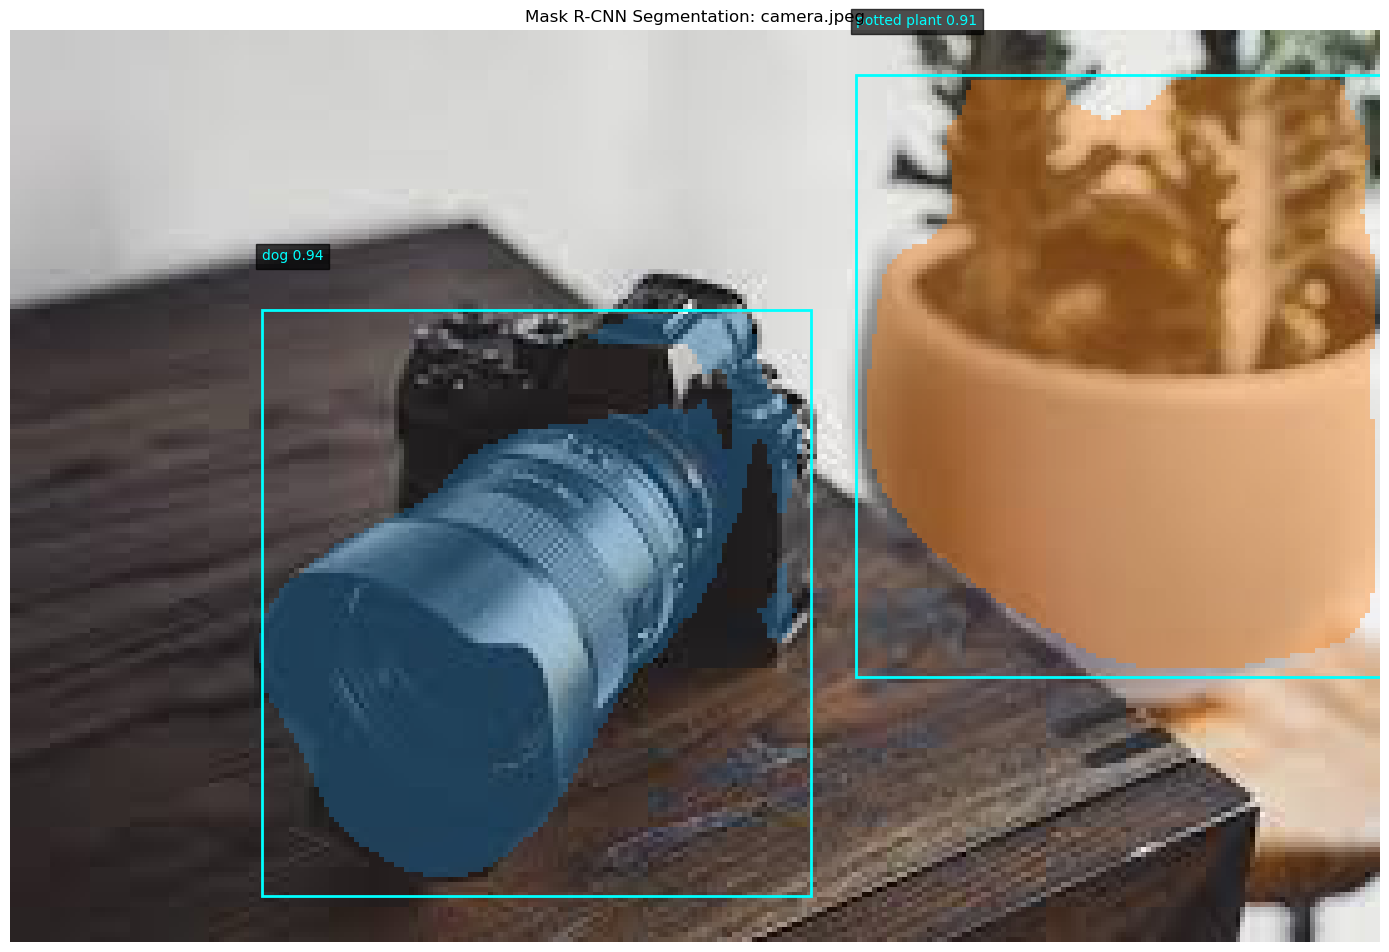

  Detected 2 instances
  Objects: dog, potted plant

Processing: camera2.jpeg


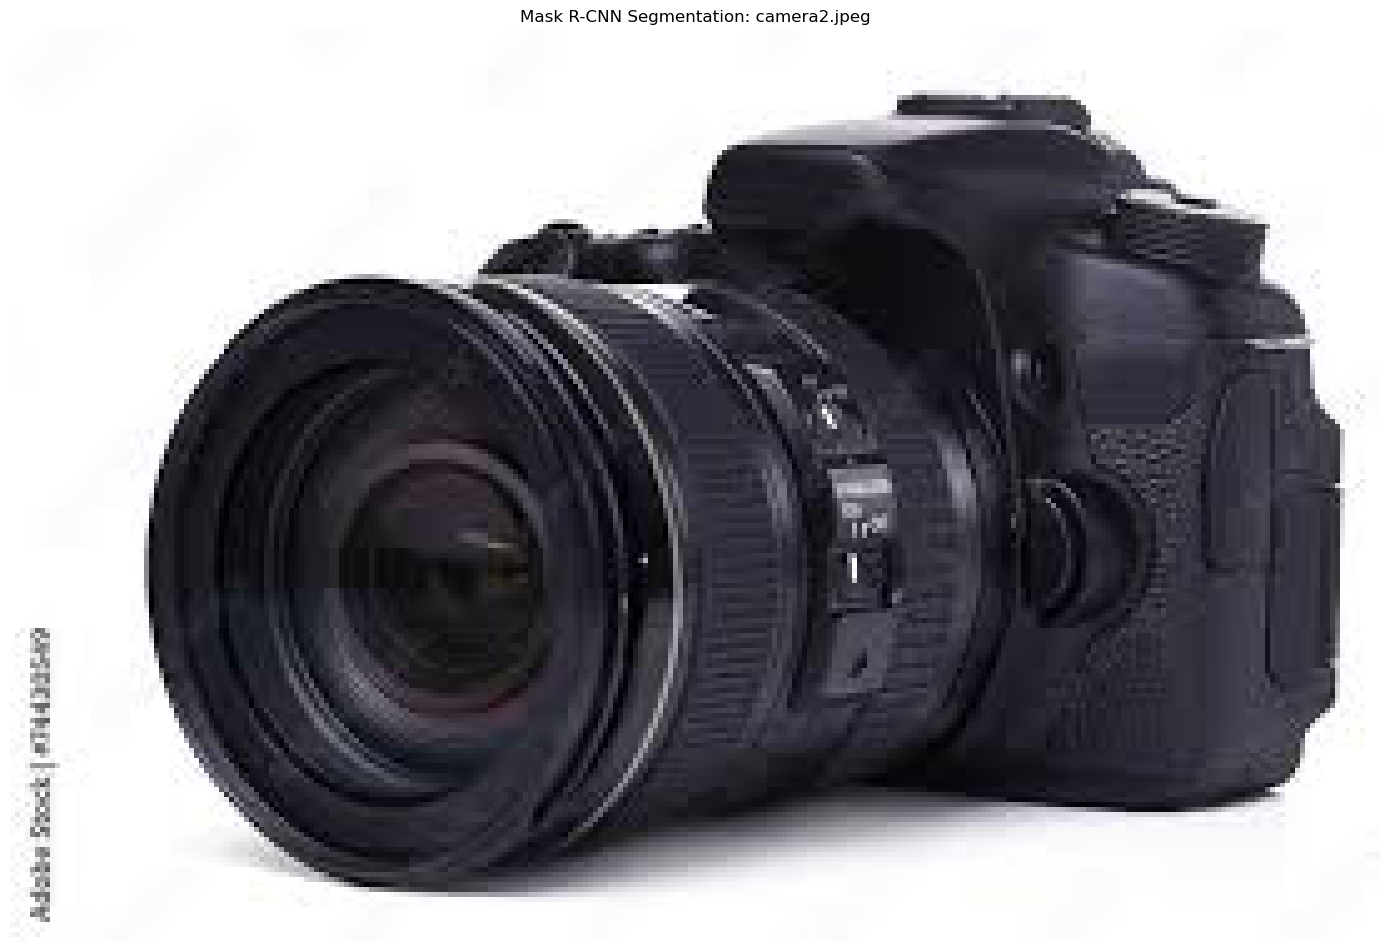

  Detected 0 instances
  Objects: 

Processing: headphones.jpeg


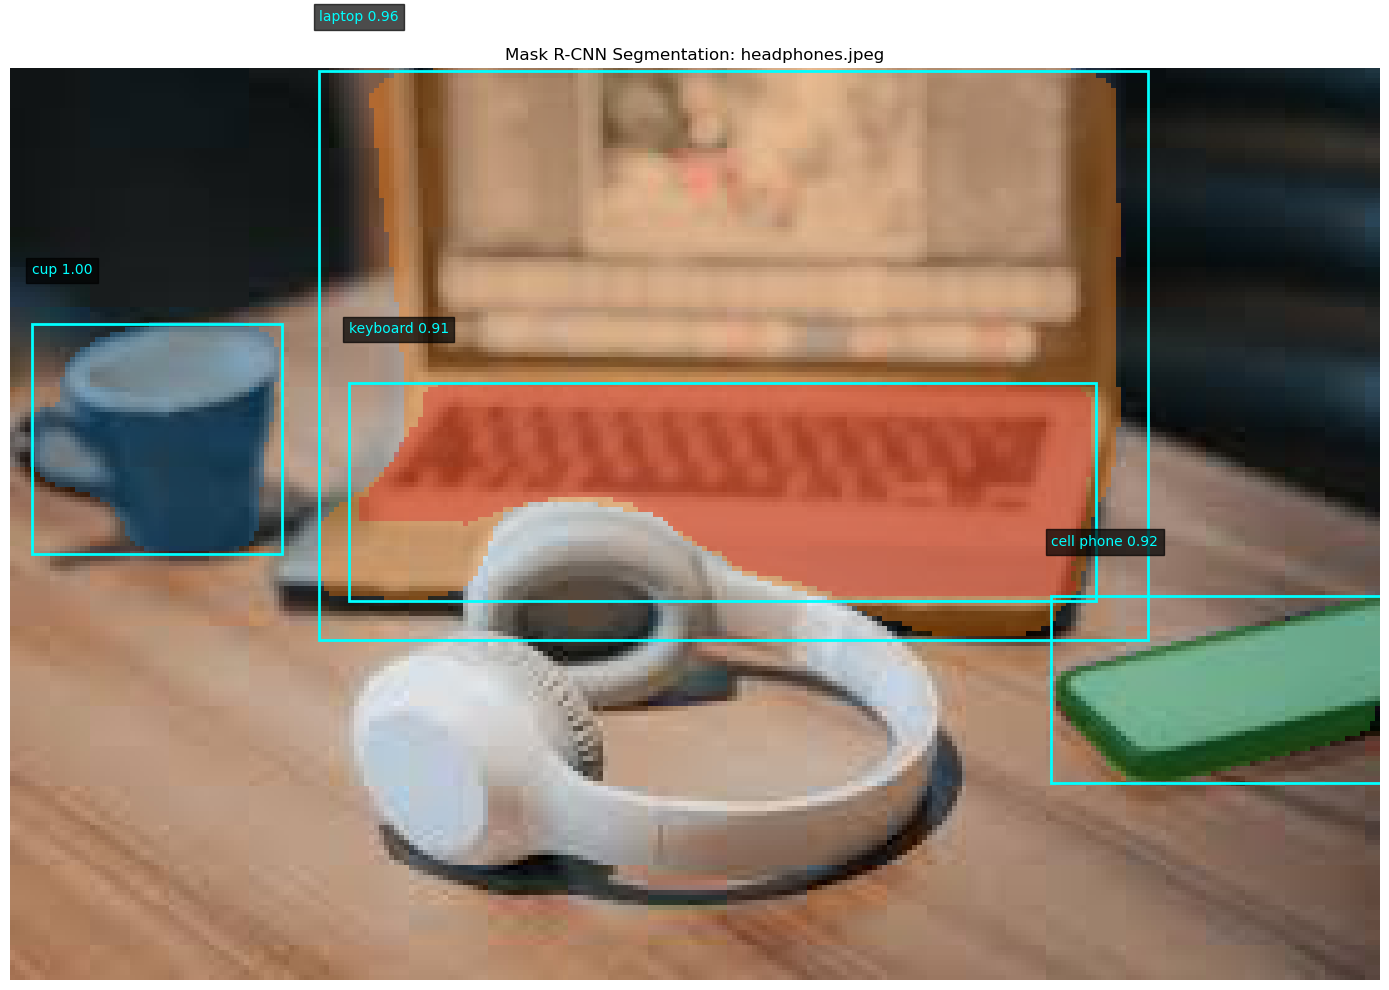

  Detected 4 instances
  Objects: cup, laptop, cell phone, keyboard

Processing: ipad.jpeg


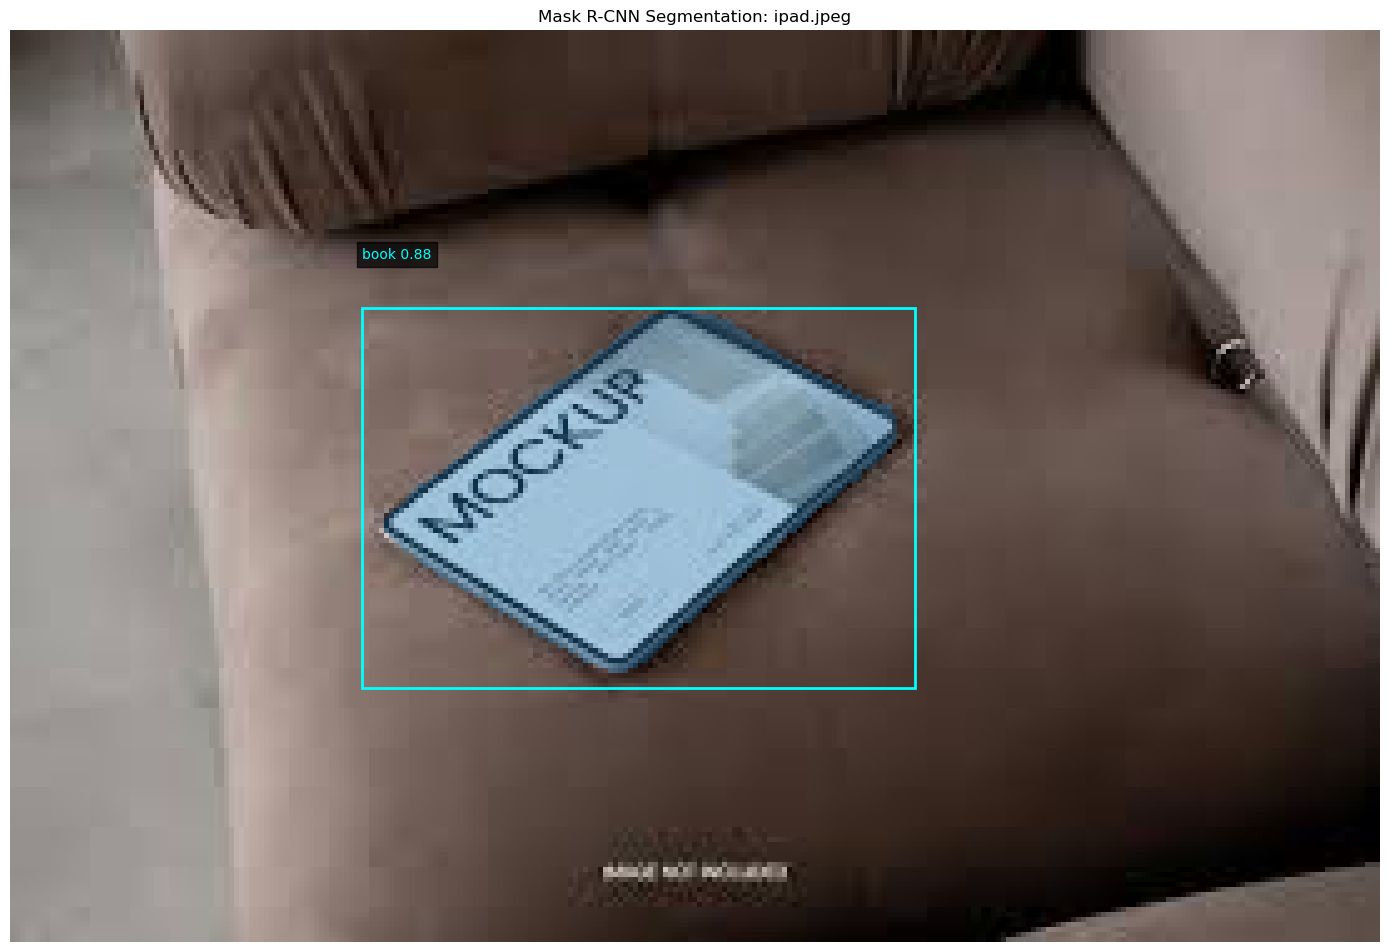

  Detected 1 instances
  Objects: book

Processing: iphone.jpeg


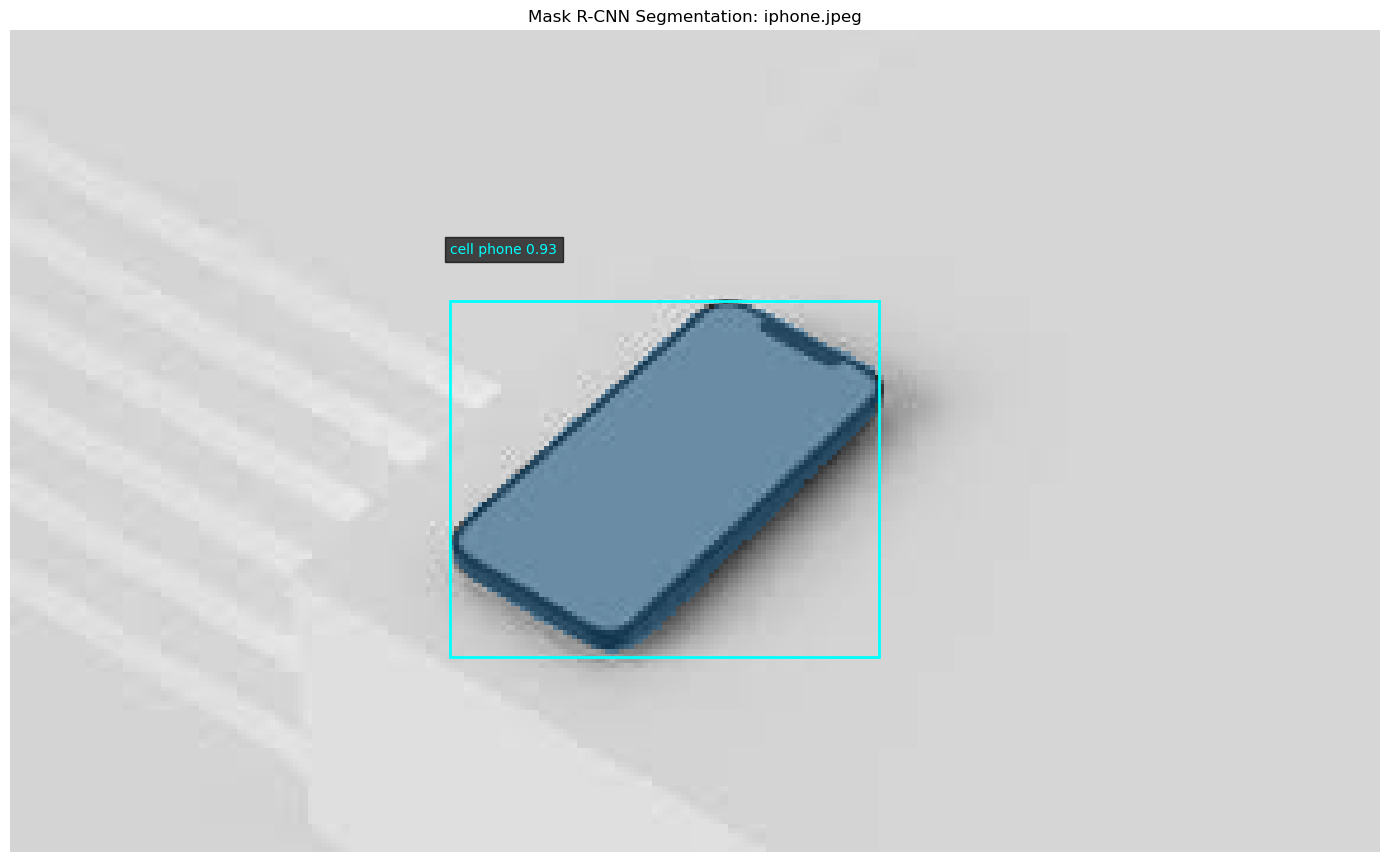

  Detected 1 instances
  Objects: cell phone

Processing: keyboard_mechanical.jpeg


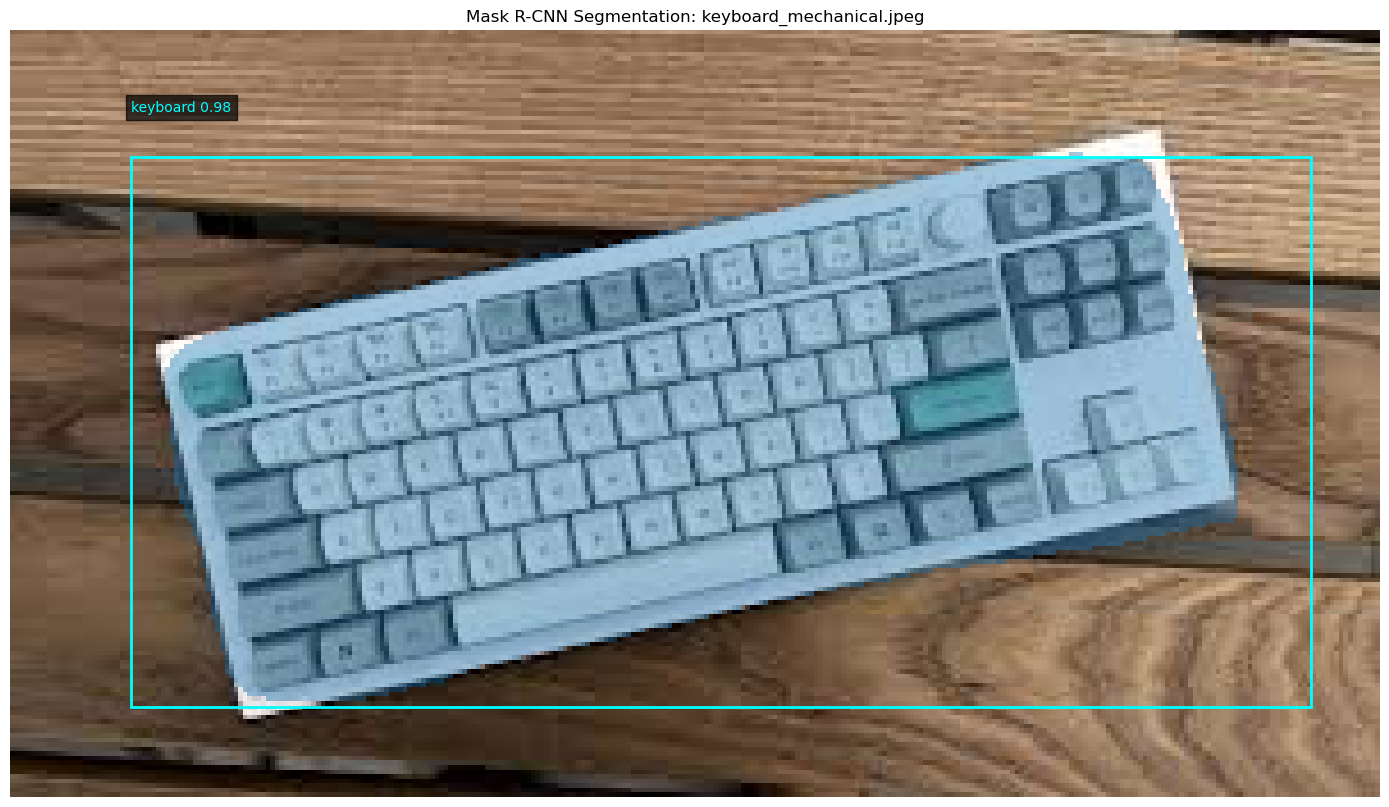

  Detected 1 instances
  Objects: keyboard

Processing: laptop_setup.jpeg


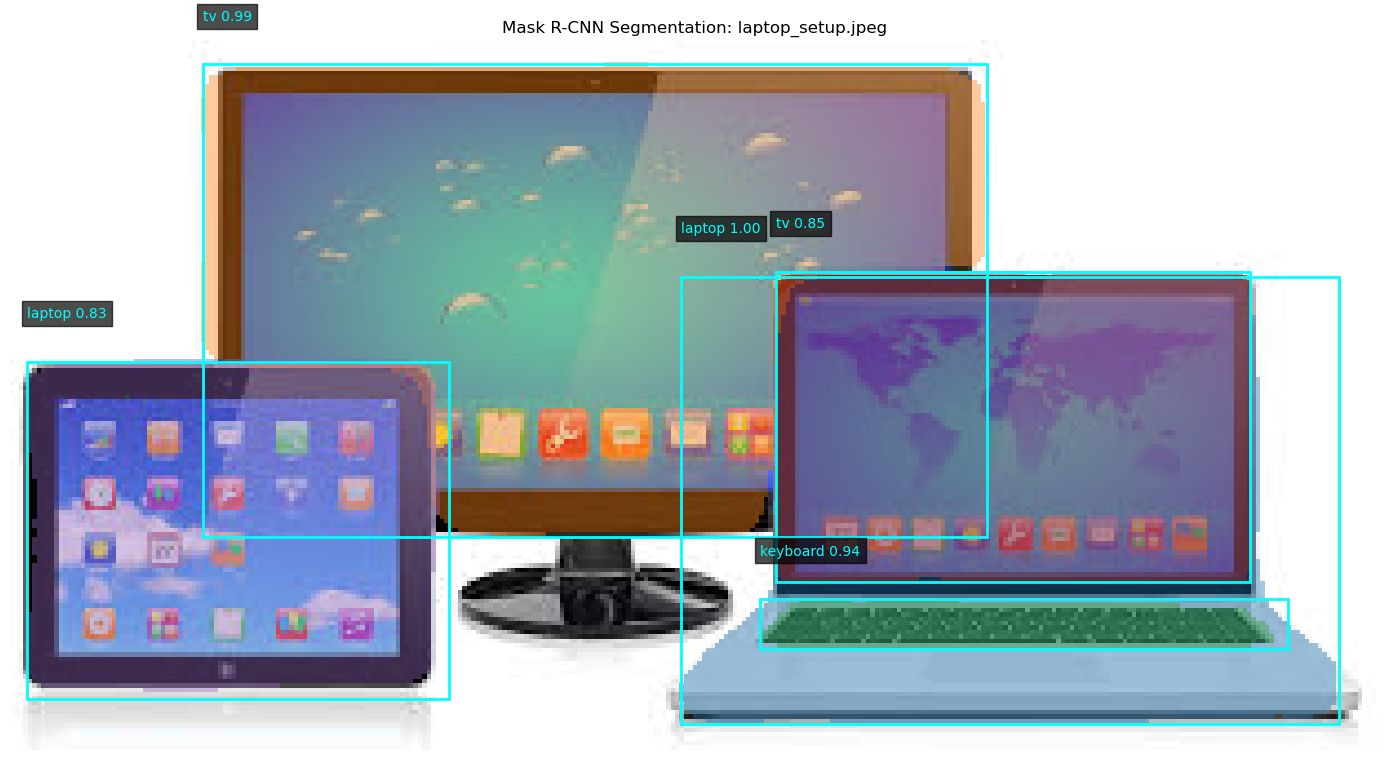

  Detected 5 instances
  Objects: laptop, tv, keyboard, tv, laptop

Processing: macbook_keyboard.jpeg


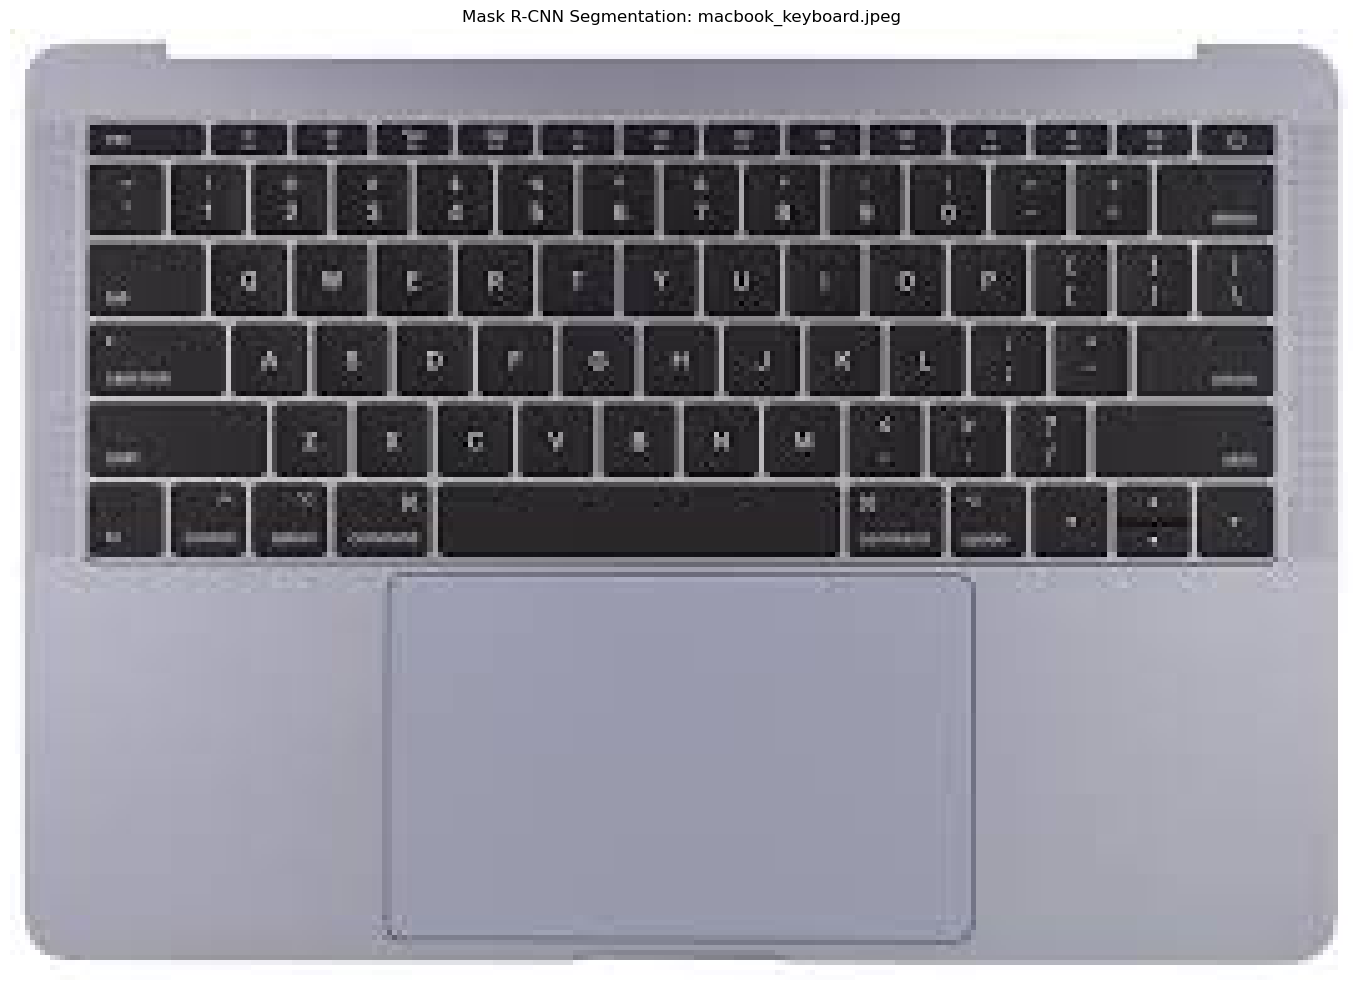

  Detected 0 instances
  Objects: 

Processing: mouse.jpeg


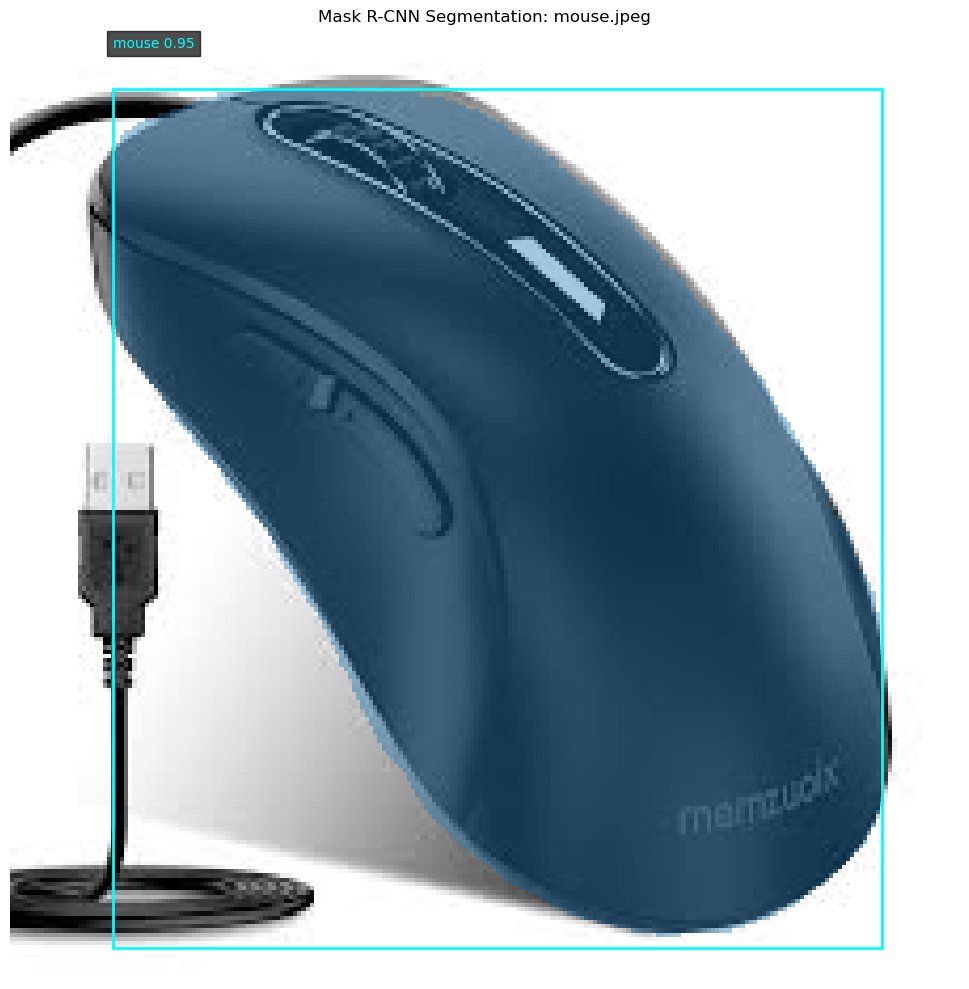

  Detected 1 instances
  Objects: mouse

Processing: Samsung_galaxy.jpeg


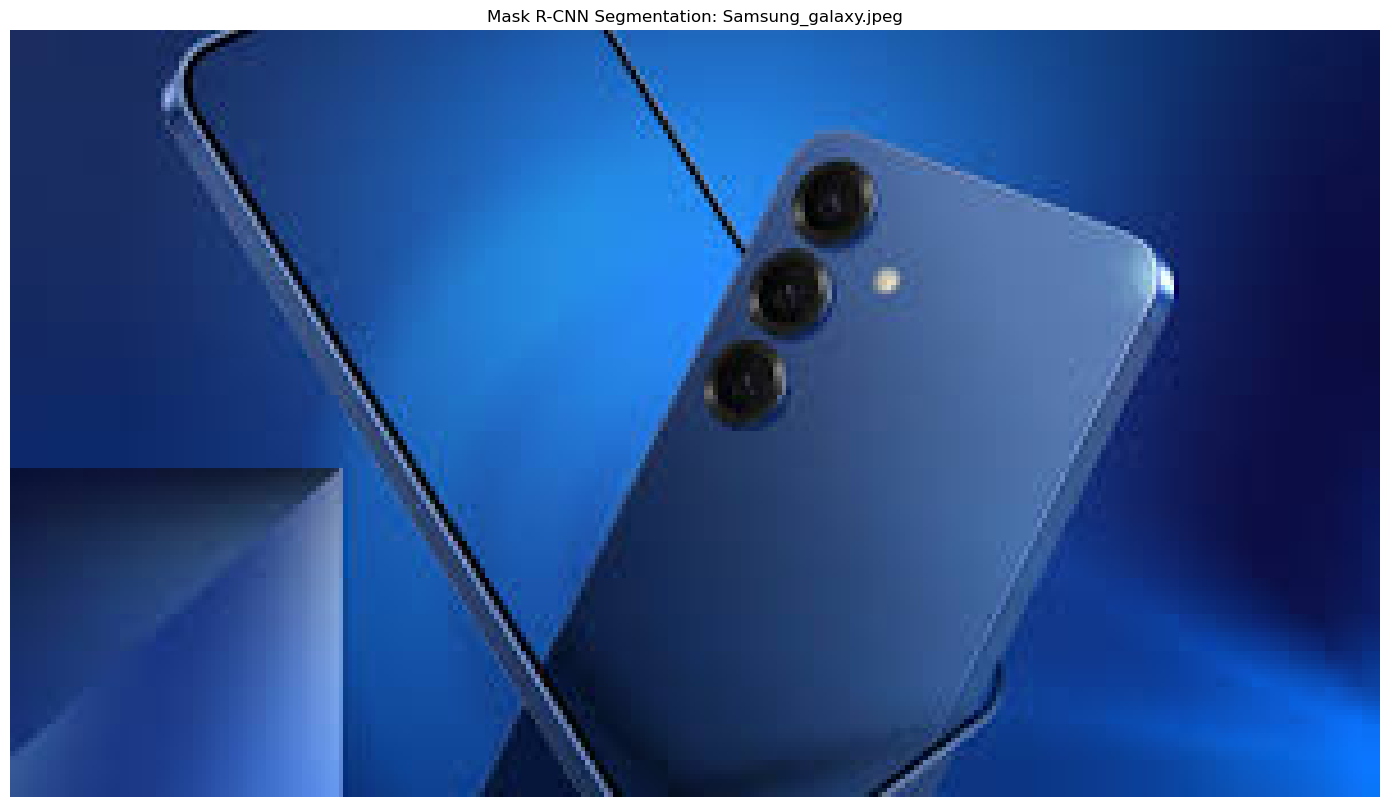

  Detected 0 instances
  Objects: 

Processing: smartwatch.jpeg


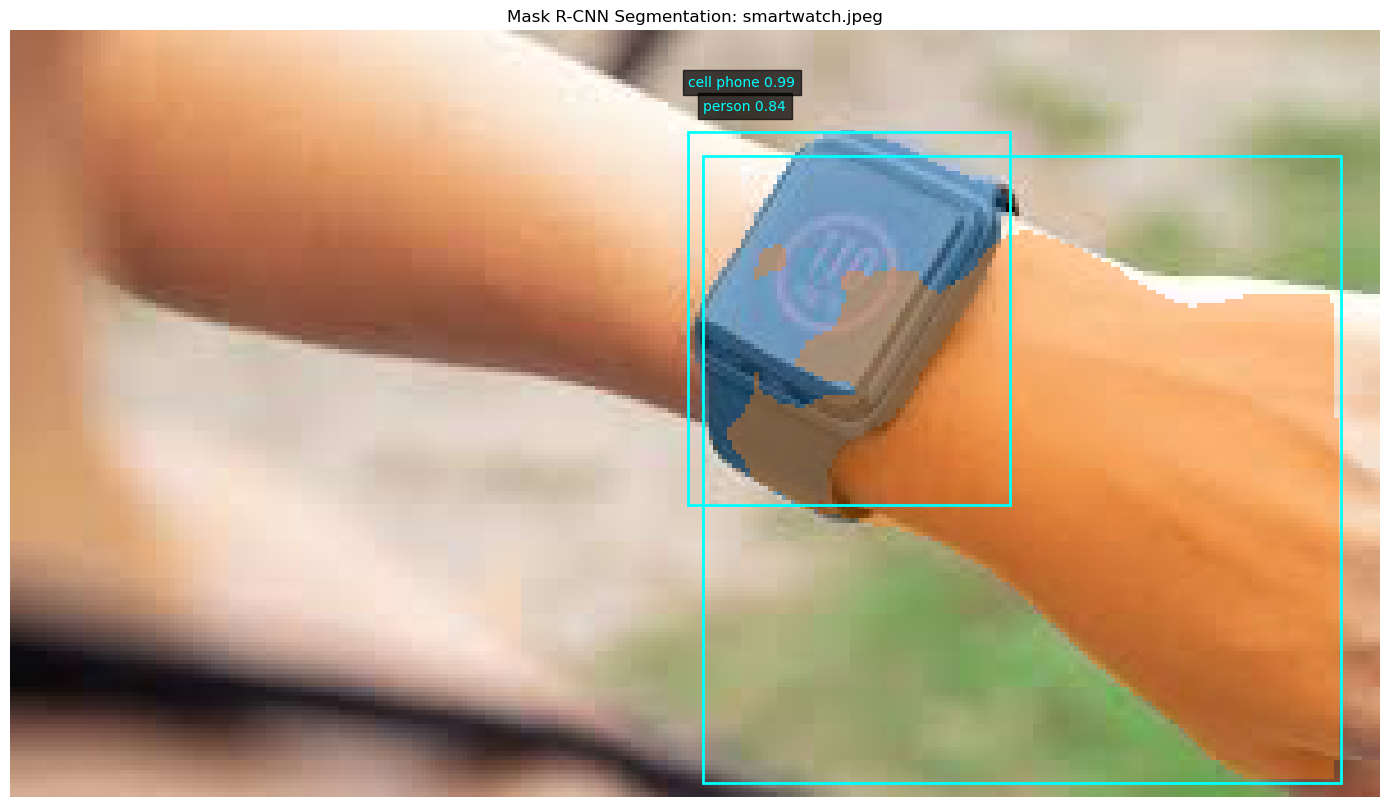

  Detected 2 instances
  Objects: cell phone, person

Processing: speaker.jpeg


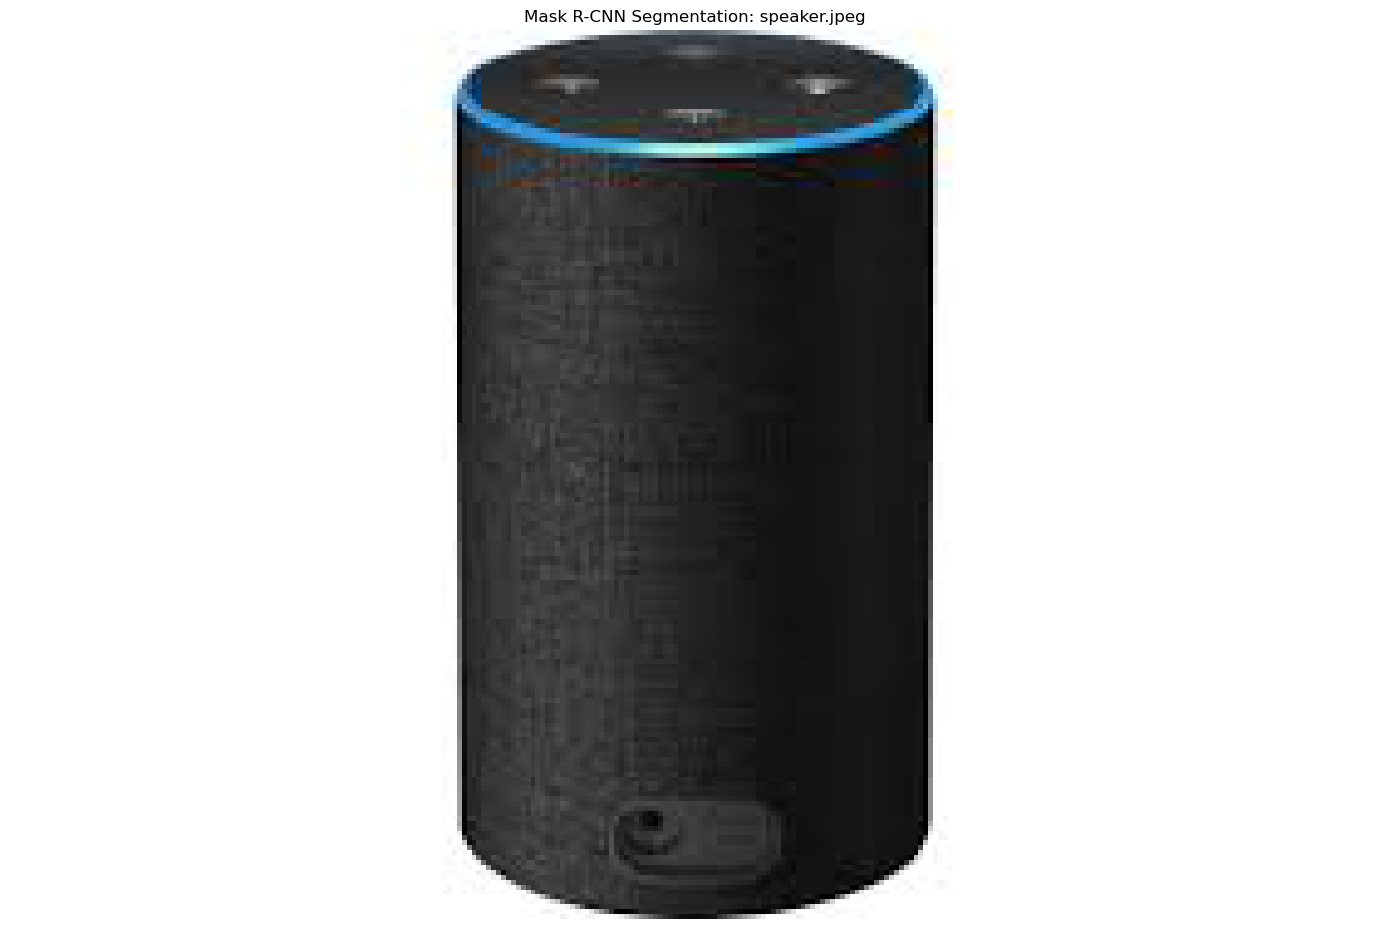

  Detected 0 instances
  Objects: 

Processing: tablet.jpeg


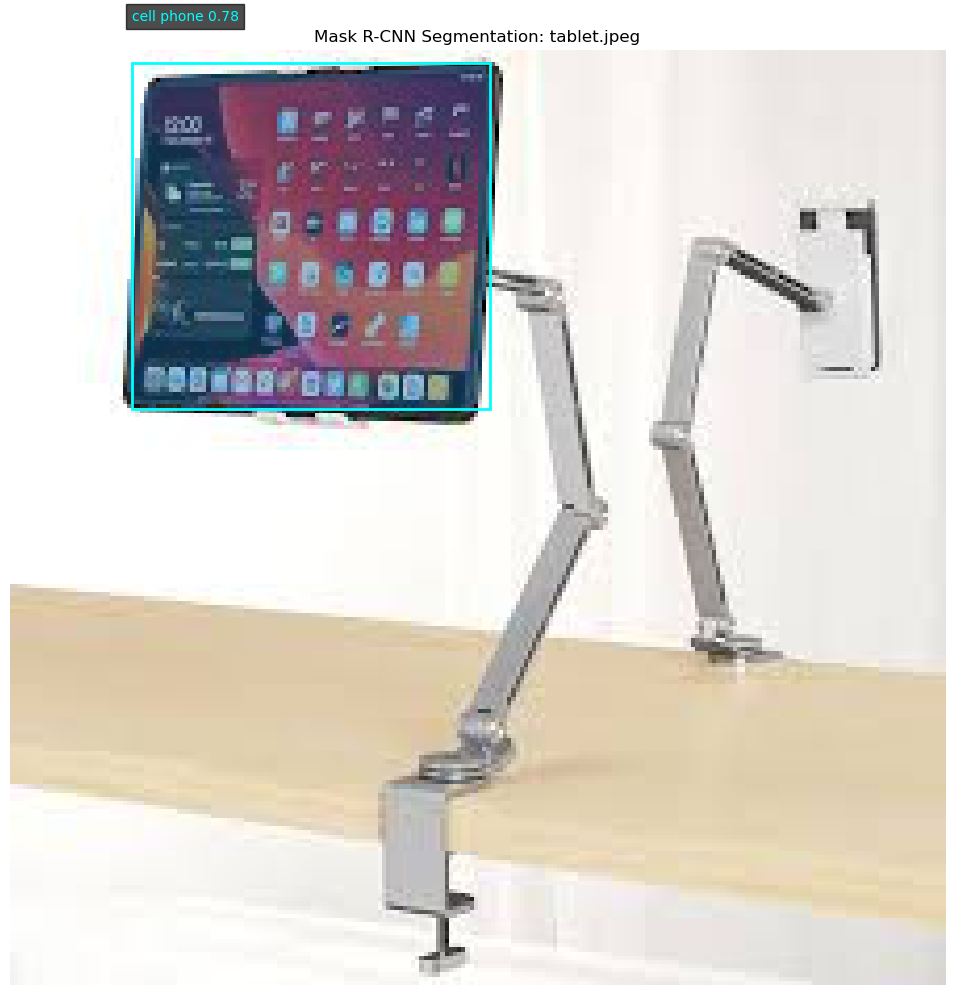

  Detected 1 instances
  Objects: cell phone

Processing: TV_remote.jpeg


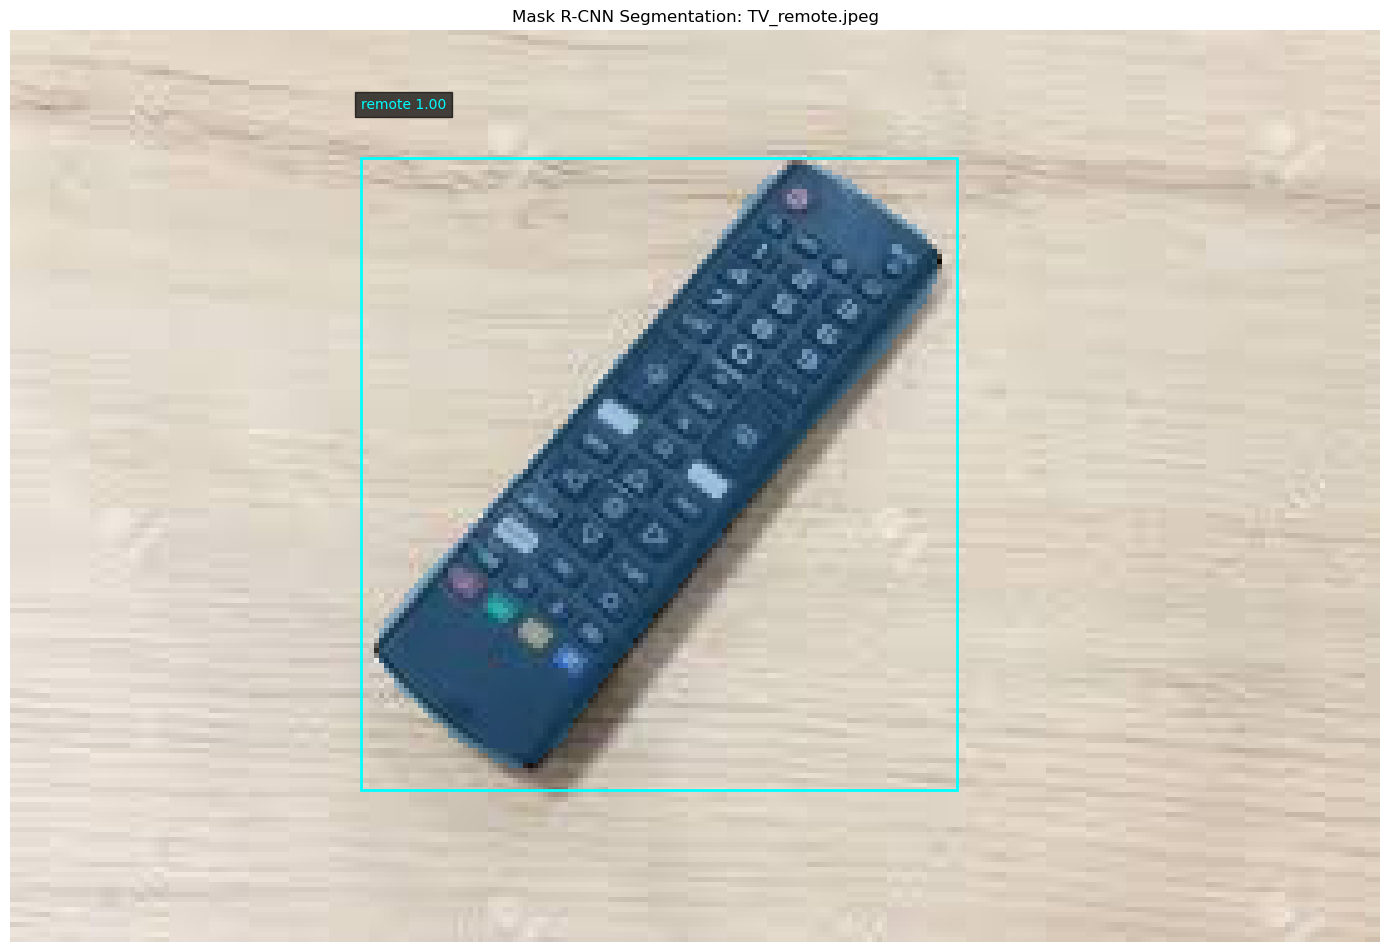

  Detected 1 instances
  Objects: remote



In [23]:
# Run Mask R-CNN on sample images
if len(image_files) > 0:
    print("Running Mask R-CNN instance segmentation...\n")
    
    maskrcnn_results = []
    
    # Process ALL images instead of just first 3
    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        print(f"Processing: {img_file}")
        
        # Run detection
        detections = detect_with_maskrcnn(img_path, conf_threshold=0.7)
        
        # Store results
        detected_objects = [COCO_CLASSES[label] for label in detections['labels']]
        maskrcnn_results.append({
            'filename': img_file,
            'num_instances': len(detections['labels']),
            'detected_objects': detected_objects,
            'avg_confidence': float(np.mean(detections['scores'])) if len(detections['scores']) > 0 else 0
        })
        
        # Visualize
        visualize_maskrcnn(img_path, detections)
        print(f"  Detected {len(detections['labels'])} instances")
        print(f"  Objects: {', '.join(detected_objects)}")
        print()

In [24]:
# Summary comparison
if maskrcnn_results:
    maskrcnn_df = pd.DataFrame(maskrcnn_results)
    print("Mask R-CNN Detection Summary:")
    print(maskrcnn_df)
    
    # Save results
    maskrcnn_df.to_csv('df_maskrcnn_detections.csv', index=False)
    print("\nSaved Mask R-CNN results to: ../Images/df_maskrcnn_detections.csv")

Mask R-CNN Detection Summary:
                    filename  num_instances  \
0                 beats.jpeg              0   
1                camera.jpeg              2   
2               camera2.jpeg              0   
3            headphones.jpeg              4   
4                  ipad.jpeg              1   
5                iphone.jpeg              1   
6   keyboard_mechanical.jpeg              1   
7          laptop_setup.jpeg              5   
8      macbook_keyboard.jpeg              0   
9                 mouse.jpeg              1   
10       Samsung_galaxy.jpeg              0   
11           smartwatch.jpeg              2   
12              speaker.jpeg              0   
13               tablet.jpeg              1   
14            TV_remote.jpeg              1   

                       detected_objects  avg_confidence  
0                                    []        0.000000  
1                   [dog, potted plant]        0.923267  
2                                    []    

### Mask R-CNN vs YOLOv8n Comparison

**Mask R-CNN Advantages:**
- Provides pixel-precise segmentation masks for each detected object
- Better at handling overlapping objects and distinguishing individual instances
- Enables precise identification of product components or damaged areas
- More accurate bounding boxes due to segmentation-guided detection

**YOLOv8n Advantages:**
- Much faster inference (5-10x faster than Mask R-CNN)
- Lighter weight model, easier to deploy
- Sufficient for simple product identification tasks
- Better suited for real-time applications

**Combined Workflow Recommendation:**
1. Use **YOLOv8n** as first-pass filter for rapid ticket routing
2. Apply **Mask R-CNN** for complex cases requiring precise segmentation
3. Combine both approaches: YOLO for speed, Mask R-CNN for accuracy when needed

**Practical Support Ticket Application:**
- YOLO: "This ticket mentions a laptop → route to laptop support team"
- Mask R-CNN: "This image shows a cracked screen (segmented region) on a phone → escalate to warranty claims"

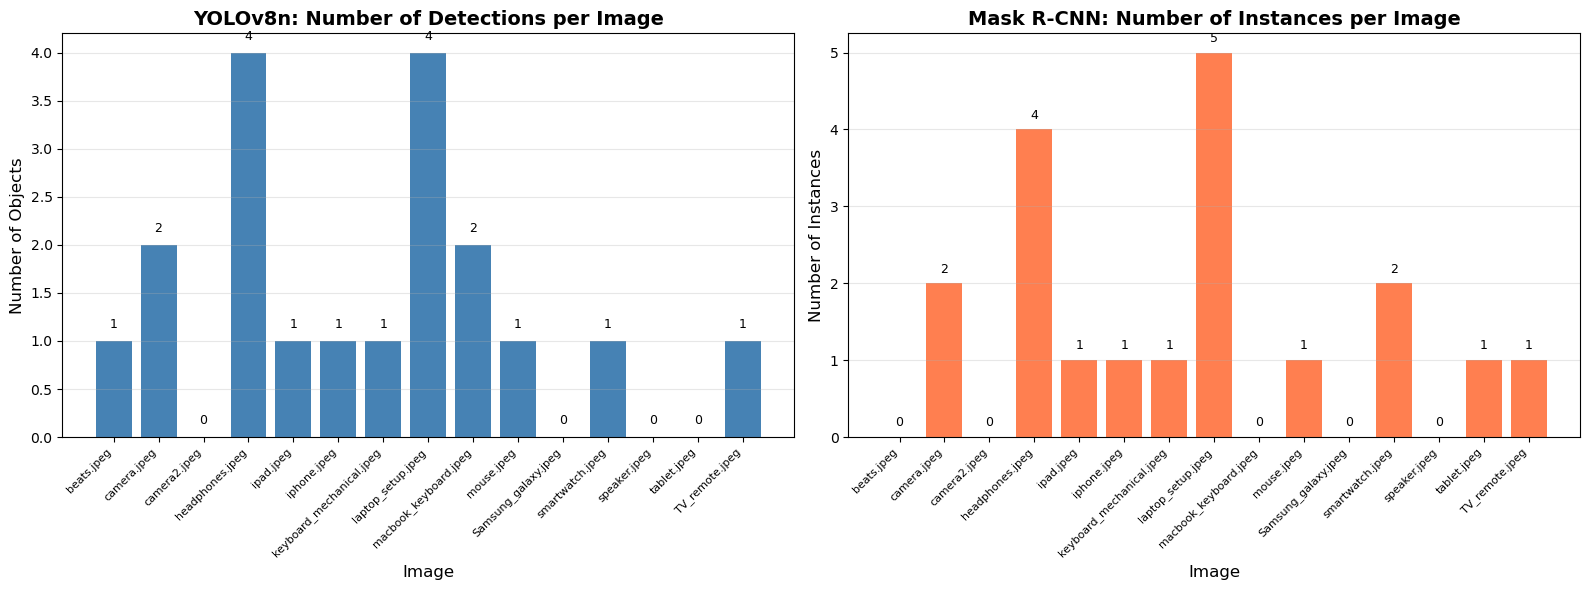


COMPARISON SUMMARY

Total images processed: 15

YOLOv8n:
  - Total detections: 19
  - Average detections per image: 1.27
  - Images with 0 detections: 4

Mask R-CNN:
  - Total instances: 19
  - Average instances per image: 1.27
  - Images with 0 instances: 5



In [25]:
# Create comparison visualization
if len(detection_results) > 0 and len(maskrcnn_results) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get image filenames for x-axis labels
    yolo_filenames = [r['filename'] for r in detection_results]
    maskrcnn_filenames = [r['filename'] for r in maskrcnn_results]
    
    # YOLO summary
    yolo_counts = [r['num_detections'] for r in detection_results]
    axes[0].bar(range(len(yolo_counts)), yolo_counts, color='steelblue')
    axes[0].set_title('YOLOv8n: Number of Detections per Image', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Image', fontsize=12)
    axes[0].set_ylabel('Number of Objects', fontsize=12)
    axes[0].set_xticks(range(len(yolo_filenames)))
    axes[0].set_xticklabels(yolo_filenames, rotation=45, ha='right', fontsize=8)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(yolo_counts):
        axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)
    
    # Mask R-CNN summary
    maskrcnn_counts = [r['num_instances'] for r in maskrcnn_results]
    axes[1].bar(range(len(maskrcnn_counts)), maskrcnn_counts, color='coral')
    axes[1].set_title('Mask R-CNN: Number of Instances per Image', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Image', fontsize=12)
    axes[1].set_ylabel('Number of Instances', fontsize=12)
    axes[1].set_xticks(range(len(maskrcnn_filenames)))
    axes[1].set_xticklabels(maskrcnn_filenames, rotation=45, ha='right', fontsize=8)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(maskrcnn_counts):
        axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("COMPARISON SUMMARY")
    print("="*60)
    print(f"\nTotal images processed: {len(image_files)}")
    print(f"\nYOLOv8n:")
    print(f"  - Total detections: {sum(yolo_counts)}")
    print(f"  - Average detections per image: {np.mean(yolo_counts):.2f}")
    print(f"  - Images with 0 detections: {sum(1 for x in yolo_counts if x == 0)}")
    
    print(f"\nMask R-CNN:")
    print(f"  - Total instances: {sum(maskrcnn_counts)}")
    print(f"  - Average instances per image: {np.mean(maskrcnn_counts):.2f}")
    print(f"  - Images with 0 instances: {sum(1 for x in maskrcnn_counts if x == 0)}")
    
    print("\n" + "="*60)
else:
    print("No detection results to compare. Please run both YOLO and Mask R-CNN cells first.")

In [26]:
# Additional: Create detailed comparison table
if len(detection_results) > 0 and len(maskrcnn_results) > 0:
    comparison_df = pd.DataFrame({
        'Image': [r['filename'] for r in detection_results],
        'YOLO_Detections': [r['num_detections'] for r in detection_results],
        'YOLO_Objects': [', '.join(r['detected_classes']) if r['detected_classes'] else 'None' for r in detection_results],
        'MaskRCNN_Instances': [r['num_instances'] for r in maskrcnn_results],
        'MaskRCNN_Objects': [', '.join(r['detected_objects']) if r['detected_objects'] else 'None' for r in maskrcnn_results],
        'MaskRCNN_Avg_Conf': [r['avg_confidence'] for r in maskrcnn_results]
    })
    
    print("\nDetailed Comparison Table:")
    print(comparison_df.to_string(index=False))
    
    # Save comparison
    comparison_df.to_csv('df_model_comparison.csv', index=False)
    print("\nSaved detailed comparison to: df_model_comparison.csv")


Detailed Comparison Table:
                   Image  YOLO_Detections                   YOLO_Objects  MaskRCNN_Instances                  MaskRCNN_Objects  MaskRCNN_Avg_Conf
              beats.jpeg                1                           cake                   0                              None           0.000000
             camera.jpeg                2     fire hydrant, potted plant                   2                 dog, potted plant           0.923267
            camera2.jpeg                0                           None                   0                              None           0.000000
         headphones.jpeg                4 laptop, cup, mouse, cell phone                   4 cup, laptop, cell phone, keyboard           0.947201
               ipad.jpeg                1                           book                   1                              book           0.884404
             iphone.jpeg                1                     cell phone                   1    

### Key Takeaways: Image Analytics for Support Tickets

1. **Feasibility Demonstrated**: Both YOLO and Mask R-CNN incorrectly detected and failed to detect common consumer electronics in product images

2. **Complementary Strengths**: Ideally, YOLO provides speed for bulk processing; Mask R-CNN adds precision for complex cases

3. **Integration Potential**: 
   - Automatic product identification can pre-populate ticket fields
   - Image analysis can validate customer claims
   - Visual evidence can prioritize tickets (e.g., visible damage → higher priority)

4. **Limitations with Pretrained Models**:
   - COCO dataset includes common objects but not all product variants
   - Fine-tuning on company-specific products would improve accuracy
   - Need labeled dataset of actual support ticket images

5. **Next Steps for Production**:
   - Collect and label real support ticket images
   - Fine-tune models on domain-specific products
   - Integrate with ticket management system
   - A/B test routing accuracy with vs. without image analysis